In [735]:
%matplotlib inline

import argparse
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance
import pandas as pd
import seaborn as sns

import torch
import cpc.feature_loader as fl
import cpc.train as tr
from cpc.dataset import AudioBatchData, findAllSeqs, filterSeqs, parseSeqLabels

sys.path.append(os.path.dirname(tr.__file__))

In [736]:
onEncodings = True

# CANNOT CALCULATE THIS? I DON'T UNDERSTAND THE ERROR
# CP = '/pio/scratch/1/i325922/wav2vec/runs/cpc/cpc-kreuk-1neg-ls+buckeye-cosine-norelu/checkpoint_49.pt'
# encodingsTsne = torch.load("./tsne_tensors/cpc-kreuk-1neg-ls+buckeye-cosine-norelu_encodingsTsne.pt") # no tSNEvecs yet

# CP = '/pio/scratch/1/i325922/wav2vec/runs/cpc/acpc-baseline-cosine-norelu-ls+buckeye/checkpoint_49.pt'
# encodingsTsne = torch.load("./tsne_tensors/acpc-baseline-cosine-norelu-ls+buckeye_encodingsTsne.pt")

CP = '/pio/scratch/1/i325922/wav2vec/runs/cpc/acpc-hierarchical-GTseg-zelazkoarch-cosine-ls100-linOut-encSegments/checkpoint_49.pt'
encodingsTsne = torch.load("./tsne_tensors/acpc-hierarchical-GTseg-zelazkoarch-cosine-ls100-linOut-encSegments_encodingsTsne.pt")

# CP = '/pio/scratch/1/i325922/wav2vec/runs/cpc/acpc-hierarchical-GTseg-zelazkoarch-cosine-buckeye-linOut-encSegments/checkpoint_49.pt'
# encodingsTsne = torch.load("./tsne_tensors/acpc-hierarchical-GTseg-zelazkoarch-cosine-buckeye-linOut-encSegments_encodingsTsne.pt")

# CP = '/pio/scratch/1/i325922/wav2vec/runs/cpc/acpc-hierarchical-kreukseg-zelazkoarch-cosine-ls100-buckeye-linOut-encSegments/checkpoint_49.pt'
# encodingsTsne = torch.load("./tsne_tensors/acpc-hierarchical-kreukseg-zelazkoarch-cosine-ls100-buckeye-linOut-encSegments_encodingsTsne.pt")

# CP = '/pio/scratch/1/i325922/wav2vec/runs/cpc/hacpc-gt-cosine-norelu-encodeseg-ls/checkpoint_49.pt'
# encodingsTsne = torch.load("./tsne_tensors/hacpc-gt-cosine-norelu-encodeseg-ls_encodingsTsne.pt")

# CP = '/pio/scratch/1/i323106/wav2vec/runs/cpc/hacpc-cosine-norelu-kreuk-encodeseg-ls+buckeye/checkpoint_49.pt'
# encodingsTsne = torch.load("./tsne_tensors/hacpc-cosine-norelu-kreuk-encodeseg-ls+buckeye_encodingsTsne.pt")

# CP = '/pio/scratch/1/i323106/wav2vec/runs/cpc/acpc-hierarchical-ground-truth-segmentation-cosine/checkpoint_49.pt'
# encodingsTsne = torch.load("./tsne_tensors/acpc-hierarchical-ground-truth-segmentation-cosine_encodingsTsne.pt")

In [737]:
cdata = fl.getCheckpointData(os.path.dirname(CP))
_, _, args = cdata
model, args.hiddenGar, args.hiddenEncoder = fl.loadModel([CP])
assert args.speakerEmbedding == 0

try:
    criterion = tr.loadCriterion(CP, model.gEncoder.DOWNSAMPLING, len(speakers), None)
except:
    criterion = None
    print("Failed to load criterion :(((())))")

args.pathDB = ['/pio/scratch/1/i323106/data/BUCKEYE/test/']
args.pathPhone = '/pio/scratch/1/i323106/data/BUCKEYE/converted_aligned_phones.txt'
args.size_window = 20480
args.file_extension = ['.wav']

seqNames, speakers = findAllSeqs(args.pathDB,
                                 extension=args.file_extension,
                                 loadCache=not args.ignore_cache)
phone_labels, n_phones = parseSeqLabels(args.pathPhone)

seq_val = seqNames[:1]
db_val = AudioBatchData(args.pathDB, args.size_window, seq_val,
                        phone_labels, len(speakers))

Loading checkpoint /pio/scratch/1/i325922/wav2vec/runs/cpc/acpc-hierarchical-GTseg-zelazkoarch-cosine-ls100-linOut-encSegments/checkpoint_49.pt
LocArgs: Namespace(CPCCTC=True, CPCCTCLearnBlank=False, CPCCTCLossTemp=1.0, CPCCTCMasq='', CPCCTCNoNegsMatchWin=False, CPCCTCNormalizeEncs=False, CPCCTCNormalizePreds=False, CPCCTCNumLevels=2, CPCCTCNumMatched=1, CPCCTCSelfLoop=False, CPCCTCSkipBeg=0, CPCCTCSkipEnd=0, CTC=False, CTCphones=False, NoARonRegHead=True, abspos=False, arMode='LSTM', batchSizeGPU=32, beta1=0.9, beta2=0.999, captureCPCCTCalign=False, captureCPCCTClogScores=False, captureConvRepr=False, captureCtxRepr=False, captureDSfreq=None, captureDStotNr=None, captureEachEpochs=10, captureEverything=False, capturePhoneAlign=False, capturePred=False, captureSetStats=None, captureSpeakerAlign=False, cpc_mode=None, debug=False, dropout=False, encodeSegments=True, encoder_type='cpc', epsilon=1e-08, file_extension=['.flac'], gru_level=-1, headWeights=[1.0, 1.0], hiddenEncoder=256, hidde

5it [00:00, 1267.47it/s]

!!!!!!!!!USING CPCCTC!!!!!!!!!!!!
Ran in an error while saving /pio/scratch/1/i323106/data/BUCKEYE/test/_seqs_cache.txt: [Errno 13] Permission denied: '/pio/scratch/1/i323106/data/BUCKEYE/test/_seqs_cache.txt'



1it [00:00, 31068.92it/s]

Checking length...
Done, elapsed: 0.003 seconds
Scanned 1 sequences in 0.00 seconds
1 chunks computed


Joining pool
Joined process, elapsed=0.131 secs


# Buckeye

In [738]:
phones2codes = {  # phonemes which should be the same for TIMIT
    'a': 0, 'aa': 1, 'aan': 2, 'ae': 3, 'aen': 4, 'ah': 0, 'ahn': 5, 'an': 5, 
    'ao': 6, 'aon': 7, 'aw': 8, 'awn': 9, 'ay': 10, 'ayn': 11, 'b': 12, 'ch': 13, 
    'd': 14, 'dh': 15, 'dx': 16, 'eh': 17, 'ehn': 18, 'el': 19, 'em': 20, 'en': 21, 
    'eng': 22, 'er': 23, 'ern': 24, 'ey': 25, 'eyn': 26, 'f': 27, 'g': 28, 'h': 29, 
    'hh': 29, 'hhn': 30, 'i': 31, 'id': 31, 'ih': 31, 'ihn': 32, 'iy': 33, 'iyih': 32, 
    'iyn': 32, 'jh': 34, 'k': 35, 'l': 36, 'm': 37, 'n': 38, 'ng': 39, 'nx': 40, 
    'ow': 41, 'own': 42, 'oy': 43, 'oyn': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 
    'sh': 49, 't': 50, 'th': 51, 'tq': 46, 'uh': 52, 'uhn': 53, 'uw': 54, 'uwix': 54, 
    'uwn': 55, 'v': 56, 'w': 57, 'y': 58, 'z': 59, 'zh': 60, '-': 61, '#': 62,
    'x': 63, 'no': 64
}

codes2phones = {v: k for k, v in phones2codes.items()}

In [739]:
model.cpu()
if criterion is not None:
    criterion.cpu()
valLoader = db_val.getDataLoader(1, 'sequential', False, numWorkers=0)
encodings = []
labels = []
waves = []
for batchData, label in valLoader:
    with torch.no_grad():
        cFeature, encodedData, _ = model(batchData, label['phone'])
    waves.append(batchData.view(1,-1))
    encodings.append(encodedData.squeeze())
    # encodings.append(cFeature[0].squeeze())
    labels.append(label['phone'].squeeze())
waves = torch.cat(waves)
encodings = torch.cat(encodings)
labels = torch.cat(labels)
print(encodings.size())
print(labels.size())

torch.Size([26752, 256])
torch.Size([26752])


In [740]:
print(labels.unique())
labels.unique().shape[0]

tensor([ 0,  1,  3,  6,  8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 25, 27,
        28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47,
        48, 49, 50, 51, 52, 54, 56, 57, 58, 59, 60, 61, 62])


49

In [741]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=50)
# pca.fit(encodings)
# encodingsPCA = pca.transform(encodings)
# encodingsPCA.shape

In [742]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=50)
# pca.fit(encodings)
# encodingsPCA = pca.transform(encodings)
# encodingsPCA.shape

# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, perplexity=50, verbose=True, n_jobs=-1, n_iter=3000)
# encodingsTsne = tsne.fit_transform(encodingsPCA)
# torch.save(encodingsTsne, "./tsne_tensors/" + CP.split("/")[-2] + "_encodingsTsne.pt")
# encodingsTsne.shape

# CONSONANTS

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

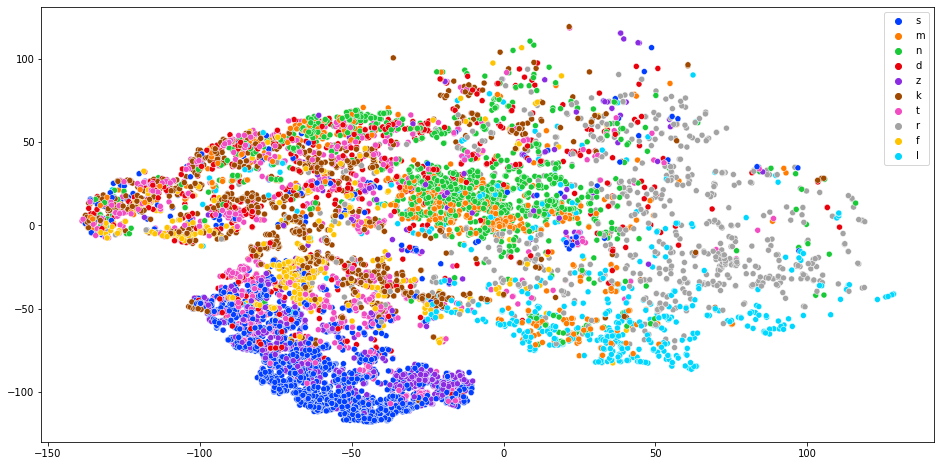

In [743]:
numClasses2Plot = 18
classes2Keep = pd.Series(labels).value_counts().index[:numClasses2Plot].tolist()

idxs2Keep = []
for i in range(len(labels)):
    if (labels[i] in classes2Keep) or (codes2phones[labels[i].item()][0] == 'l'):
        idxs2Keep.append(i)

x = encodingsTsne[idxs2Keep, :]
y = labels[idxs2Keep]

idxs2Keep = []
for i in range(len(y)):
    if codes2phones[y[i].item()][0] not in ['a', 'e', 'i', 'o', 'u', 'y']:
        idxs2Keep.append(i)

c = x[idxs2Keep, :]
y = y[idxs2Keep]

numClasses2Plot = len(np.unique(y))

z = []
for i in range(len(y)):
    z.append(codes2phones[y[i].item()])

plt.figure(figsize=(16, 8))
sns.scatterplot(c[:,0], c[:,1], hue=z, legend='full', palette=sns.color_palette("bright", len(set(z))))

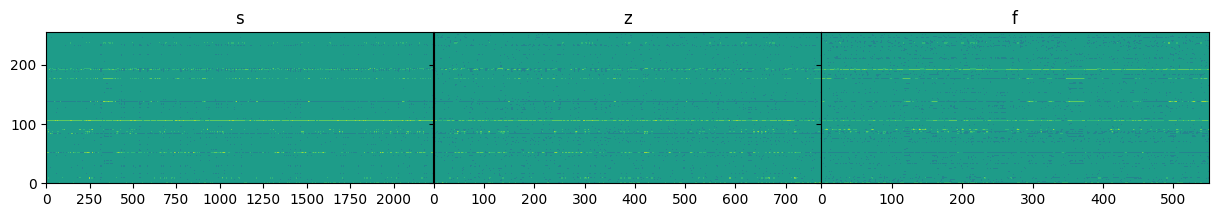

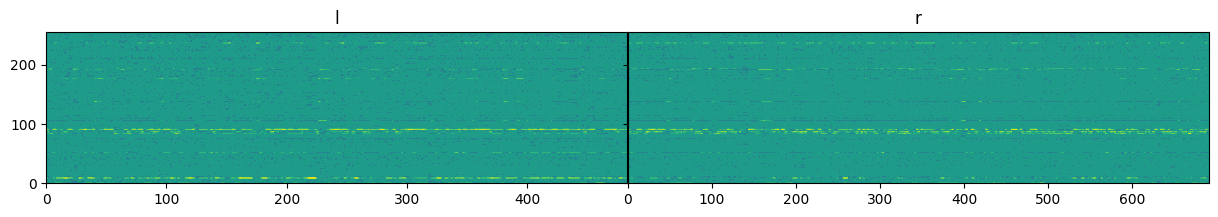

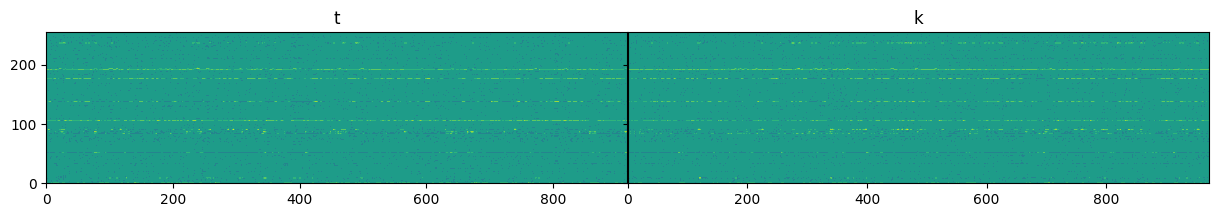

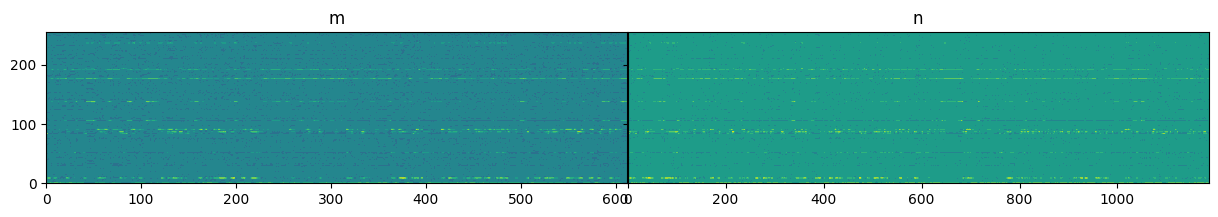

In [744]:
combs_to_plot = [('s', 'z', 'f'), ('l', 'r'), ('t', 'k'), ('m', 'n')]

# for phn in y.unique():
#     phn_encodings = encodings[labels == phn.item()]

#     X = np.arange(0, phn_encodings.shape[0])
#     Y = np.arange(0, 256)
#     X, Y = np.meshgrid(X, Y)

#     phn_encodings = phn_encodings / np.sqrt((phn_encodings**2).sum(1, keepdims=True))
#     Z = phn_encodings.reshape(phn_encodings.shape[0], phn_encodings.shape[1]).T

#     plt.figure(figsize=(7, 2), dpi=100)
#     plt.contourf(X, Y, Z, 10)
#     plt.title(codes2phones[phn.item()])
#     plt.show()

for comb in combs_to_plot:

    fig, axs = plt.subplots(1, len(comb), figsize=(15, 2), dpi=100, sharey=True)
    fig.subplots_adjust(hspace = .0, wspace=.001)
    axs = axs.ravel()

    for p in range(len(comb)):

        phn_encodings = encodings[labels == phones2codes[comb[p]]]
        X = np.arange(0, phn_encodings.shape[0])
        Y = np.arange(0, 256)
        X, Y = np.meshgrid(X, Y)

        phn_encodings = phn_encodings / np.sqrt((phn_encodings**2).sum(1, keepdims=True))
        Z = phn_encodings.reshape(phn_encodings.shape[0], phn_encodings.shape[1]).T
        axs[p].contourf(X, Y, Z, 10)
        axs[p].set_title(comb[p])
    plt.show()

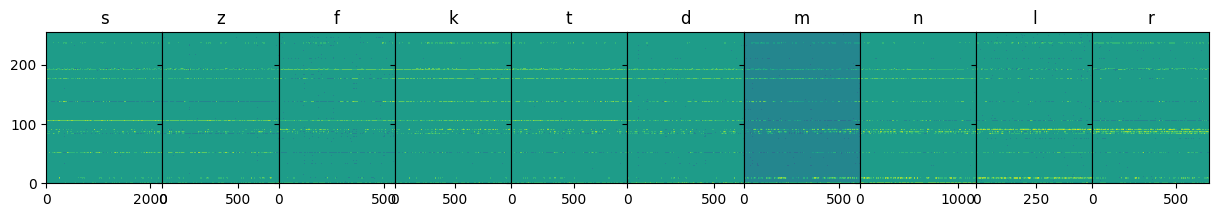

In [745]:
cons = ['s', 'z', 'f', 'k', 't', 'd', 'm', 'n', 'l', 'r']

fig, axs = plt.subplots(1, len(cons), figsize=(15, 2), dpi=100, sharey=True)
fig.subplots_adjust(wspace = .0)
axs = axs.ravel()

for p in range(len(cons)):
    phn_encodings = encodings[labels == phones2codes[cons[p]]]
    X = np.arange(0, phn_encodings.shape[0])
    Y = np.arange(0, 256)
    X, Y = np.meshgrid(X, Y)
    phn_encodings = phn_encodings / np.sqrt((phn_encodings**2).sum(1, keepdims=True))
    Z = phn_encodings.reshape(phn_encodings.shape[0], phn_encodings.shape[1]).T
    axs[p].contourf(X, Y, Z, 10)
    axs[p].set_title(cons[p])
plt.show()

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

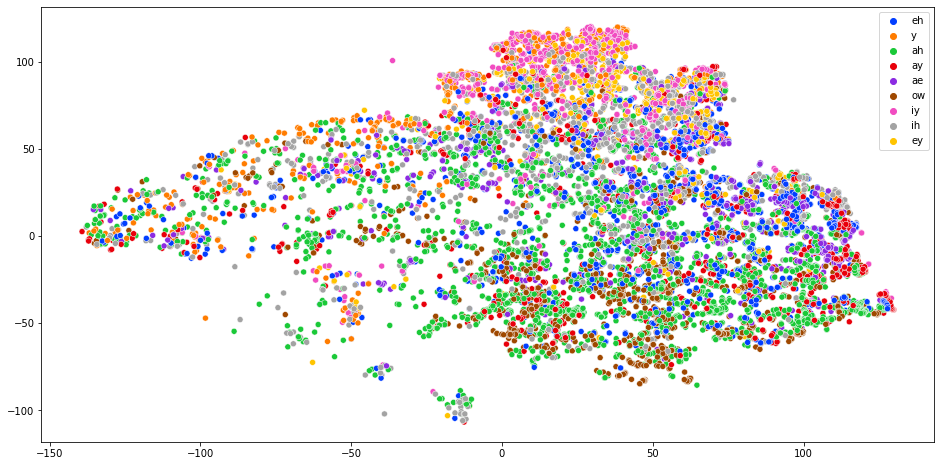

In [746]:
numClasses2Plot = 18
classes2Keep = pd.Series(labels).value_counts().index[:numClasses2Plot].tolist()

idxs2Keep = []
for i in range(len(labels)):
    if labels[i] in classes2Keep:
        idxs2Keep.append(i)

x = encodingsTsne[idxs2Keep, :]
y = labels[idxs2Keep]

selected_encs = encodings[idxs2Keep, :]

idxs2Keep = []
for i in range(len(y)):
    if codes2phones[y[i].item()][0] in ['a', 'e', 'i', 'o', 'u', 'y']:
        idxs2Keep.append(i)

v = x[idxs2Keep, :]
y = y[idxs2Keep]
selected_encs = selected_encs[idxs2Keep, :]

numClasses2Plot = len(np.unique(y))

z = []
for i in range(len(y)):
    z.append(codes2phones[y[i].item()])

plt.figure(figsize=(16, 8))
sns.set_palette("bright", n_colors=numClasses2Plot)
sns.scatterplot(v[:,0], v[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numClasses2Plot))

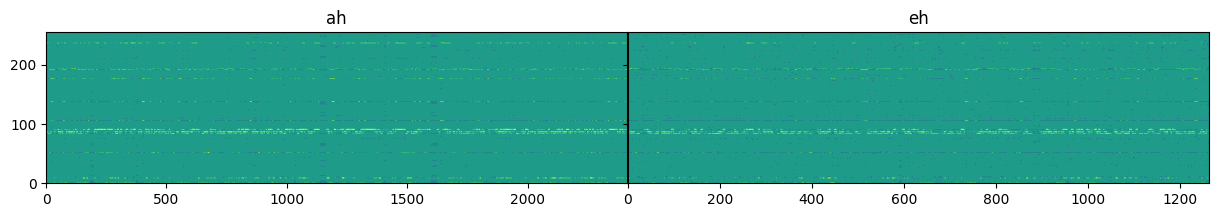

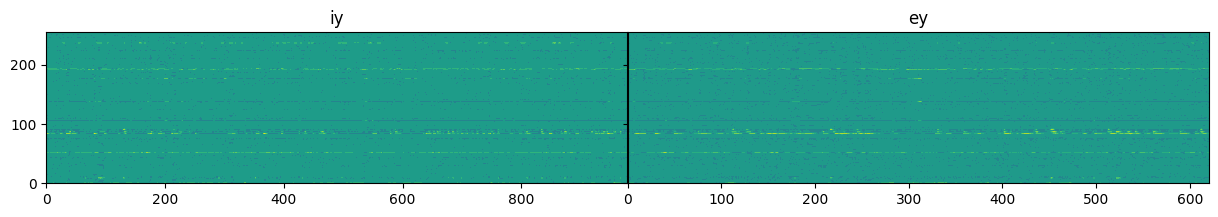

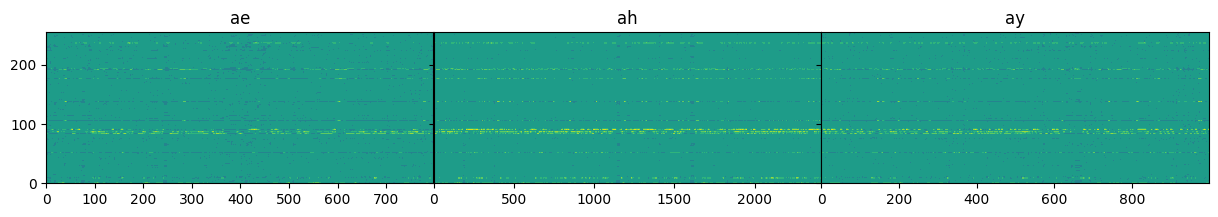

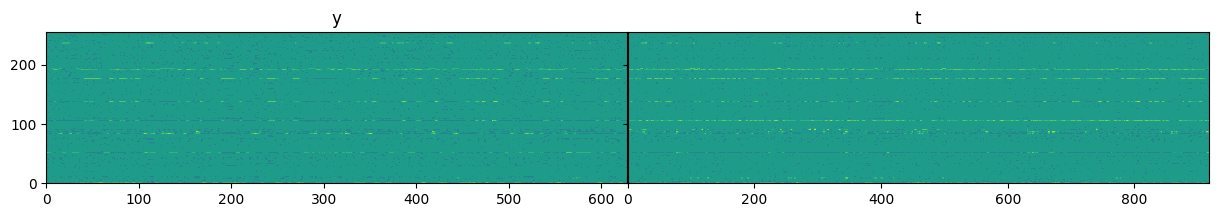

In [747]:
combs_to_plot = [('ah', 'eh'), ('iy', 'ey'), ('ae', 'ah', 'ay'), ('y', 't')]

# for phn in y.unique():
#     phn_encodings = encodings[labels == phn.item()]

#     X = np.arange(0, phn_encodings.shape[0])
#     Y = np.arange(0, 256)
#     X, Y = np.meshgrid(X, Y)

#     phn_encodings = phn_encodings / np.sqrt((phn_encodings**2).sum(1, keepdims=True))
#     Z = phn_encodings.reshape(phn_encodings.shape[0], phn_encodings.shape[1]).T

#     plt.figure(figsize=(7, 2), dpi=100)
#     plt.contourf(X, Y, Z, 10)
#     plt.title(codes2phones[phn.item()])
#     plt.show()

for comb in combs_to_plot:

    fig, axs = plt.subplots(1, len(comb), figsize=(15, 2), dpi=100, sharey=True)
    fig.subplots_adjust(hspace = .0, wspace=.001)
    axs = axs.ravel()

    for p in range(len(comb)):

        phn_encodings = encodings[labels == phones2codes[comb[p]]]
        X = np.arange(0, phn_encodings.shape[0])
        Y = np.arange(0, 256)
        X, Y = np.meshgrid(X, Y)

        phn_encodings = phn_encodings / np.sqrt((phn_encodings**2).sum(1, keepdims=True))
        Z = phn_encodings.reshape(phn_encodings.shape[0], phn_encodings.shape[1]).T
        axs[p].contourf(X, Y, Z, 10)
        axs[p].set_title(comb[p])
    plt.show()

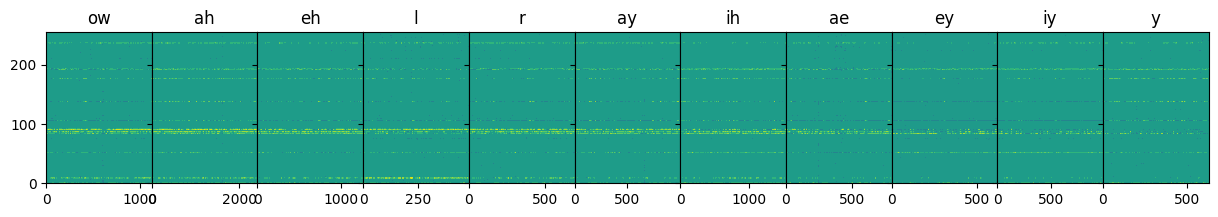

In [748]:
vows = ['ow', 'ah', 'eh', 'l', 'r', 'ay', 'ih', 'ae', 'ey', 'iy', 'y'] 

fig, axs = plt.subplots(1, len(vows), figsize=(15, 2), dpi=100, sharey=True)
fig.subplots_adjust(wspace = .0)
axs = axs.ravel()

for p in range(len(vows)):
    phn_encodings = encodings[labels == phones2codes[vows[p]]]
    X = np.arange(0, phn_encodings.shape[0])
    Y = np.arange(0, 256)
    X, Y = np.meshgrid(X, Y)
    phn_encodings = phn_encodings / np.sqrt((phn_encodings**2).sum(1, keepdims=True))
    Z = phn_encodings.reshape(phn_encodings.shape[0], phn_encodings.shape[1]).T
    axs[p].contourf(X, Y, Z, 10)
    axs[p].set_title(vows[p])
plt.show()

# Local tSNE encodings? ie. tSNE within a particular vowel?

# For case when Vowel + X

In [749]:
diffs = torch.diff(labels)
phoneChanges = torch.cat((torch.ones(1), diffs), dim=-1)
boundaries = torch.nonzero(phoneChanges.contiguous().view(-1), as_tuple=True)[0]

In [750]:
spread_vows = ['ah', 'eh', 'ae']

paired_labels = torch.clone(labels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(len(boundaries)-1):
    current_phone = codes2phones[labels[boundaries[b]].item()]
    if current_phone in spread_vows: 
        next_phone = codes2phones[labels[boundaries[b+1]].item()]
        if (current_phone, next_phone) not in pairs:
            pairs.append((current_phone, next_phone))
            paired_phones2codes[(current_phone + '-' + next_phone)] = surplus
            surplus += 1
        paired_labels[boundaries[b]:boundaries[b+1]] = paired_phones2codes[(current_phone + '-' + next_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


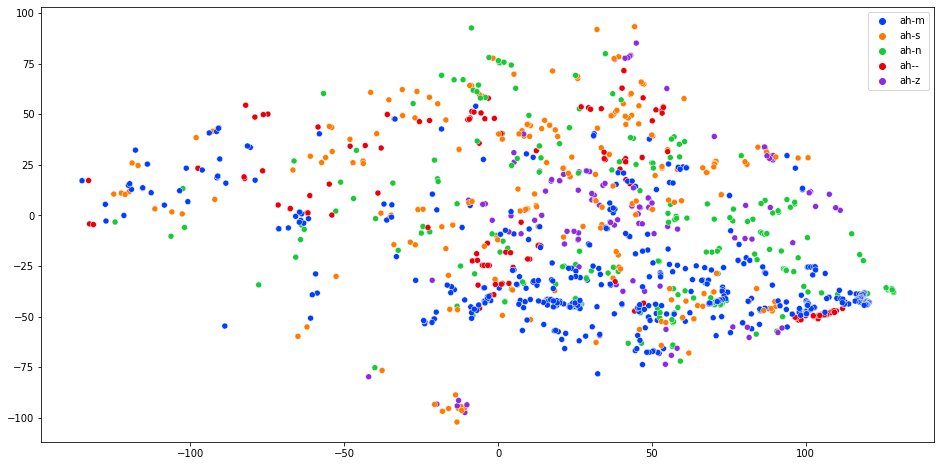

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


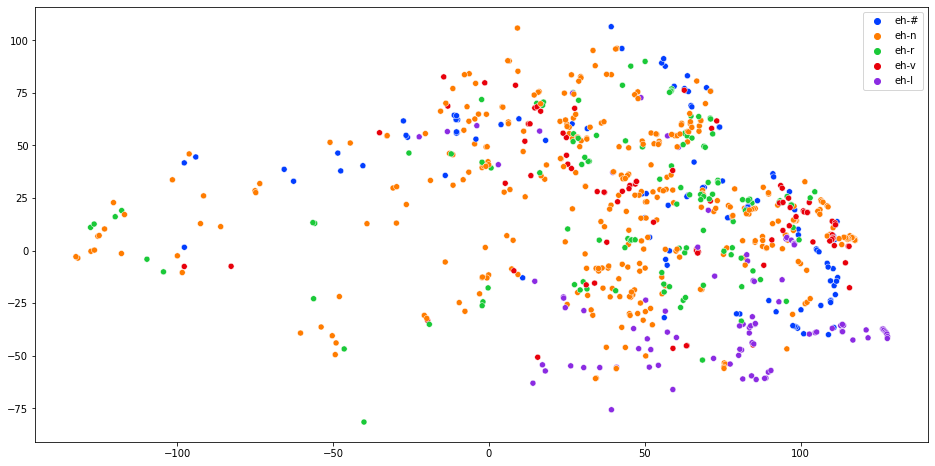

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


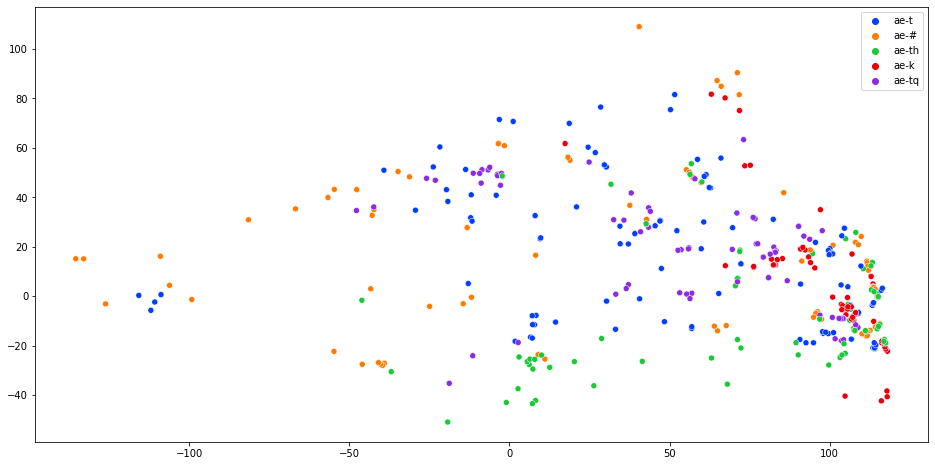

In [751]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
pca.fit(encodings)
encodingsPCA = pca.transform(encodings)
encodingsPCA.shape

numPairs2Plot = 5

for sv in spread_vows:

    sv_encodingsPCA = encodingsPCA[labels == phones2codes[sv]]

    tsne = TSNE(n_components=2, perplexity=50, verbose=False, n_jobs=-1, n_iter=3000)
    sv_encodingsTsne = tsne.fit_transform(sv_encodingsPCA)

    idx_where_vow = labels == phones2codes[sv]

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numPairs2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    #ns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numPairs2Plot))
    plt.show()

# Or Known Mistaken Consonant + X

In [752]:
mistaken_cons = ['l', 'r', 'w']

paired_labels = torch.clone(labels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(len(boundaries)-1):
    current_phone = codes2phones[labels[boundaries[b]].item()]
    if current_phone in mistaken_cons: 
        next_phone = codes2phones[labels[boundaries[b+1]].item()]
        if (current_phone, next_phone) not in pairs:
            pairs.append((current_phone, next_phone))
            paired_phones2codes[(current_phone + '-' + next_phone)] = surplus
            surplus += 1
        paired_labels[boundaries[b]:boundaries[b+1]] = paired_phones2codes[(current_phone + '-' + next_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


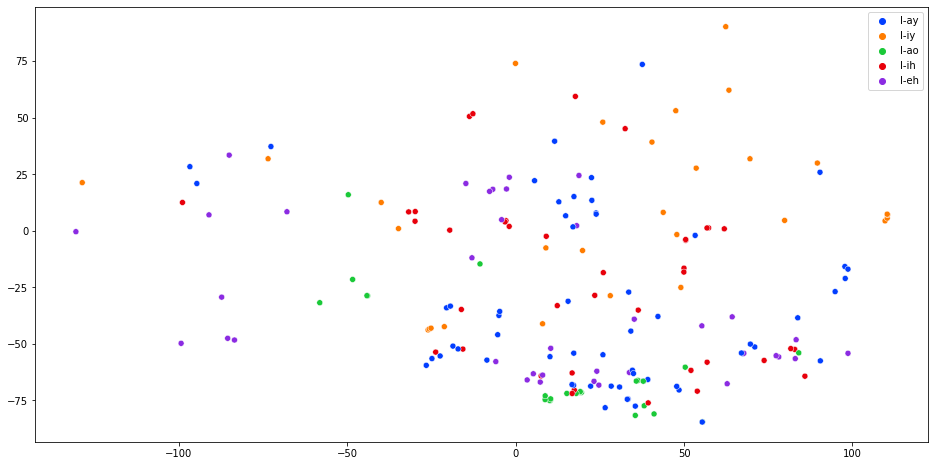

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


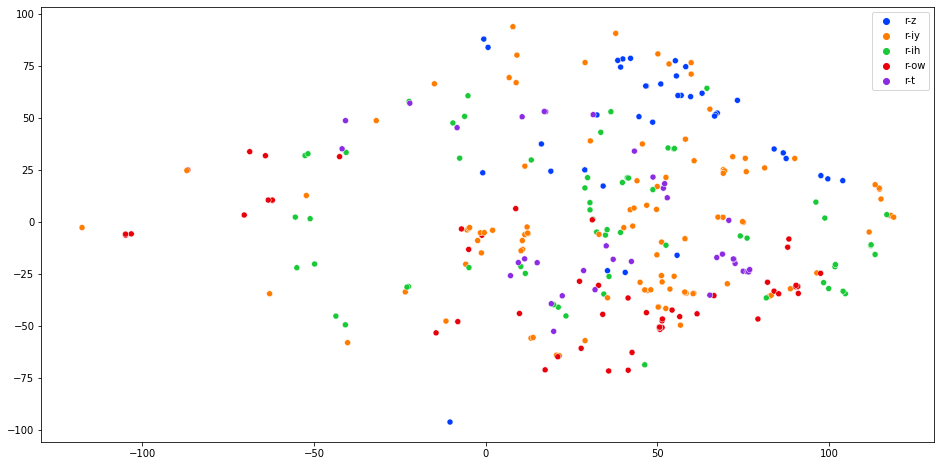

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


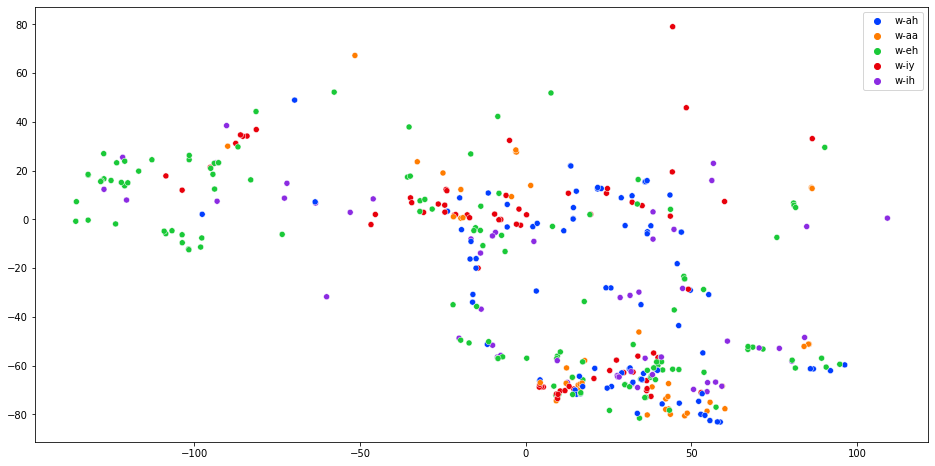

In [753]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
pca.fit(encodings)
encodingsPCA = pca.transform(encodings)
encodingsPCA.shape

numPairs2Plot = 5

for mc in mistaken_cons:

    mc_encodingsPCA = encodingsPCA[labels == phones2codes[mc]]

    tsne = TSNE(n_components=2, perplexity=20, verbose=False, n_jobs=-1, n_iter=3000)
    mc_encodingsTsne = tsne.fit_transform(mc_encodingsPCA)

    idx_where_vow = labels == phones2codes[mc]

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numPairs2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    #ns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numPairs2Plot))
    plt.show()

# For case when X + Vowel

In [754]:
spread_vows = ['ah', 'eh', 'ae']

paired_labels = torch.clone(labels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(1, len(boundaries)-1):
    current_phone = codes2phones[labels[boundaries[b]].item()]
    if current_phone in spread_vows: 
        prev_phone = codes2phones[labels[boundaries[b-1]].item()]
        if (prev_phone, current_phone) not in pairs:
            pairs.append((prev_phone, current_phone))
            paired_phones2codes[(prev_phone + '-' + current_phone)] = surplus
            surplus += 1
        paired_labels[boundaries[b]:boundaries[b+1]] = paired_phones2codes[(prev_phone + '-' + current_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


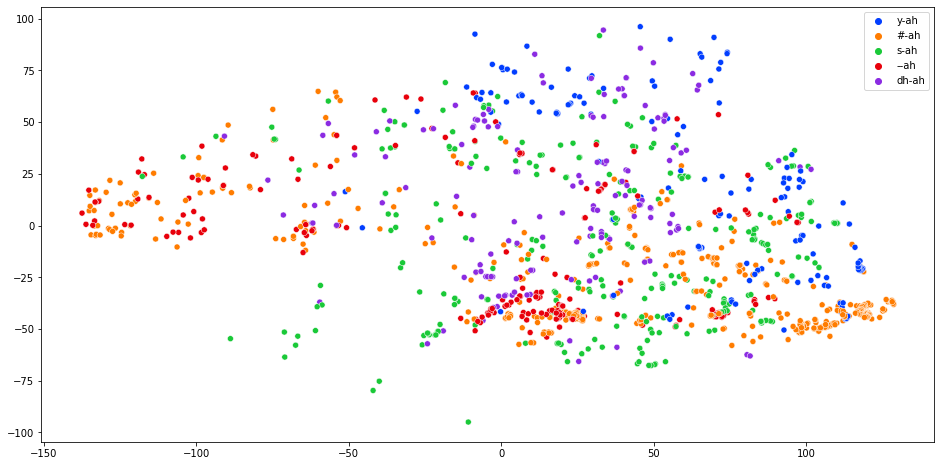

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


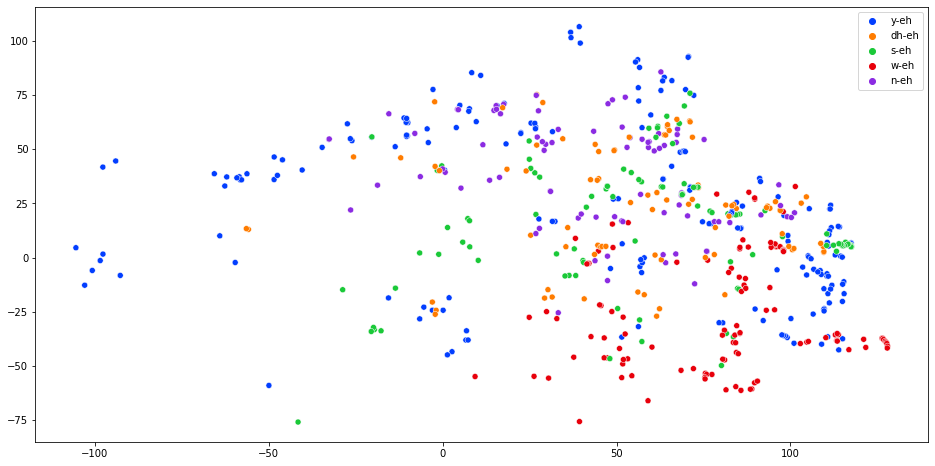

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


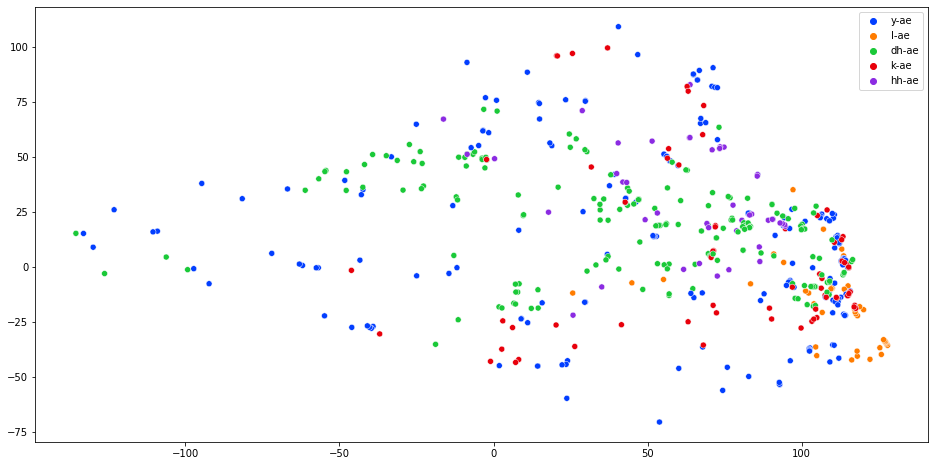

In [755]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
pca.fit(encodings)
encodingsPCA = pca.transform(encodings)
encodingsPCA.shape

numPairs2Plot = 5

for sv in spread_vows:

    sv_encodingsPCA = encodingsPCA[labels == phones2codes[sv]]

    tsne = TSNE(n_components=2, perplexity=50, verbose=False, n_jobs=-1, n_iter=3000)
    sv_encodingsTsne = tsne.fit_transform(sv_encodingsPCA)

    idx_where_vow = labels == phones2codes[sv]

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numPairs2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    #ns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numPairs2Plot))
    plt.show()

In [756]:
mistaken_cons = ['l', 'r', 'w']

paired_labels = torch.clone(labels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(1, len(boundaries)-1):
    current_phone = codes2phones[labels[boundaries[b]].item()]
    if current_phone in mistaken_cons: 
        prev_phone = codes2phones[labels[boundaries[b-1]].item()]
        if (prev_phone, current_phone) not in pairs:
            pairs.append((prev_phone, current_phone))
            paired_phones2codes[(prev_phone + '-' + current_phone)] = surplus
            surplus += 1
        paired_labels[boundaries[b]:boundaries[b+1]] = paired_phones2codes[(prev_phone + '-' + current_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


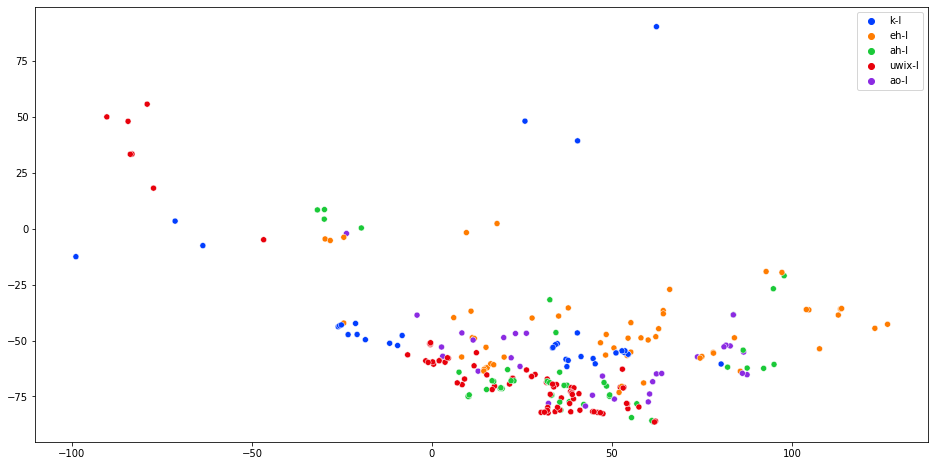

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


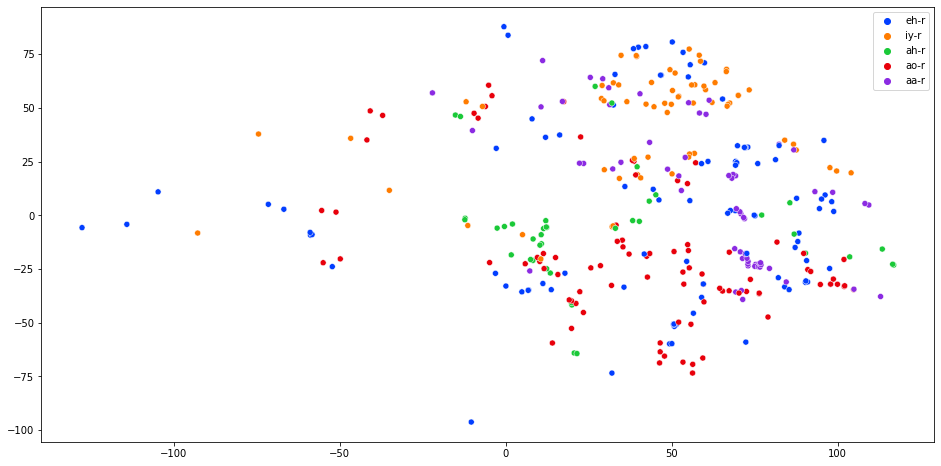

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


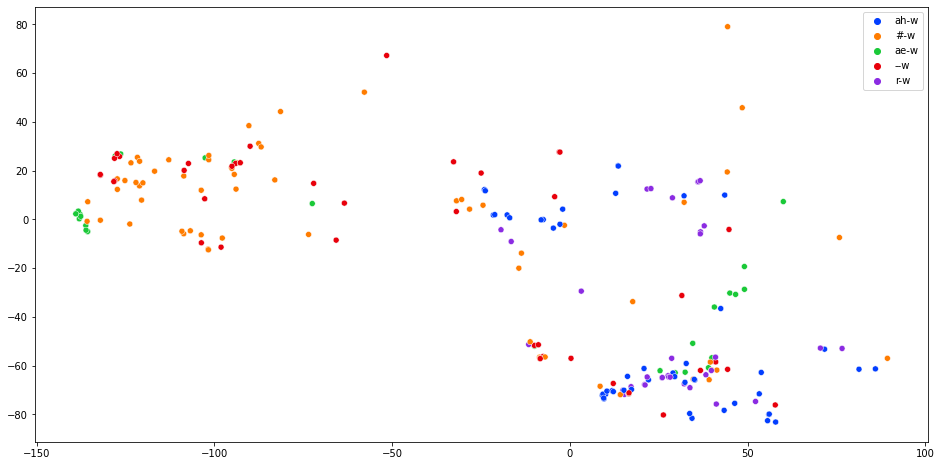

In [757]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
pca.fit(encodings)
encodingsPCA = pca.transform(encodings)
encodingsPCA.shape

numPairs2Plot = 5

for mc in mistaken_cons:

    mc_encodingsPCA = encodingsPCA[labels == phones2codes[mc]]

    tsne = TSNE(n_components=2, perplexity=20, verbose=False, n_jobs=-1, n_iter=3000)
    mc_encodingsTsne = tsne.fit_transform(mc_encodingsPCA)

    idx_where_vow = labels == phones2codes[mc]

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numPairs2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    #ns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numPairs2Plot))
    plt.show()

# Insight into the lengths of the phones??

In [758]:
diffs = torch.diff(labels)
phoneChanges = torch.cat((torch.ones(1), diffs), dim=-1)
boundaries = torch.nonzero(phoneChanges.contiguous().view(-1), as_tuple=True)[0]
bin_boundaries = phoneChanges != 0
cumsum_boundaries = torch.cumsum(bin_boundaries, dim=-1)
N_segments = bin_boundaries.sum()

U = torch.arange(1, N_segments+1).view(-1, N_segments).expand(bin_boundaries.shape[0], -1)
V = U - cumsum_boundaries.view(bin_boundaries.shape[0], -1)
W = 1 - torch.tanh(100000 * abs(V))
phoneLengths = torch.sum(W, dim=0)
W /= torch.sum(W, dim=0)

avgSegmentEncodings = W.permute(1, 0) @ encodings
avgLabels = torch.unique_consecutive(labels)

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


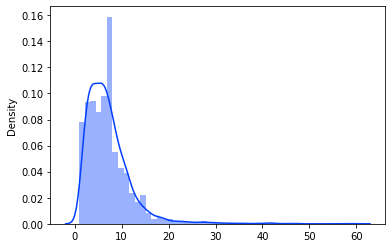

In [759]:
plt.figure()
sns.distplot(phoneLengths)
plt.show()

lenLabels = torch.clone(phoneLengths)
code2len = {0: 'Short (<50)', 1: "Medium (50-100)", 2: 'Long (100<)'}
len2code = {v: k for k, v in code2len.items()} 
lenLabels[lenLabels < 5] = 0 # == short
lenLabels[(5 <= lenLabels) & (lenLabels <= 10)] = 1 # == medium
lenLabels[10 < lenLabels] = 2 # == long

# need to expand to have label for each frame
to_cat = []
for l in range(lenLabels.shape[0]):
    to_add = lenLabels[l].expand(int(phoneLengths[l].item()))
    to_cat.append(to_add)
lenLabels = torch.cat(to_cat)
assert lenLabels.shape == labels.shape

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


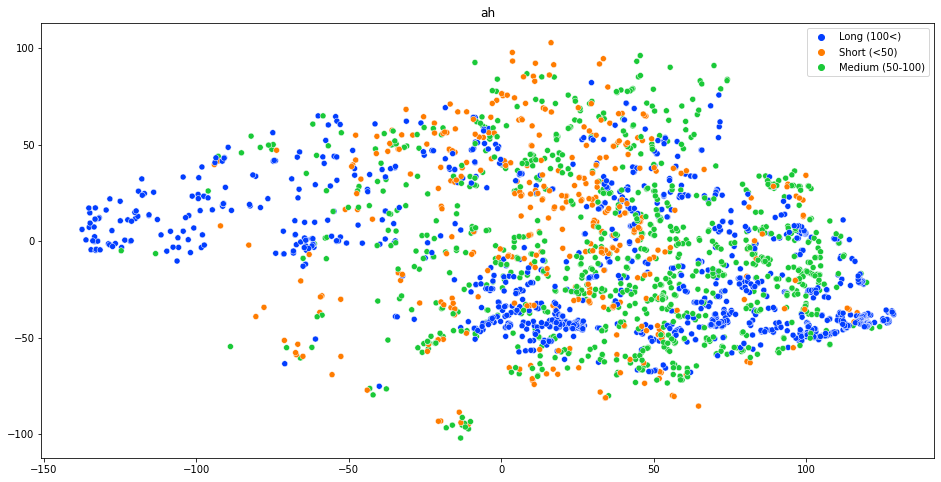

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


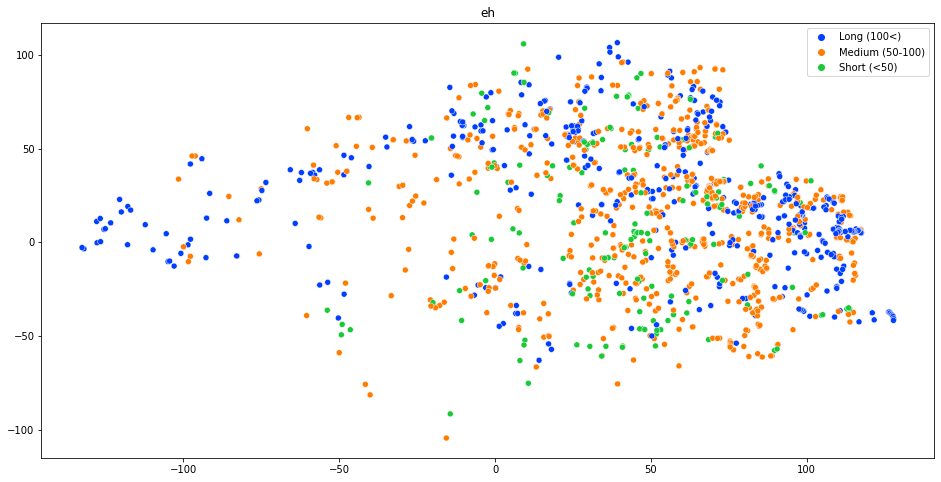

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


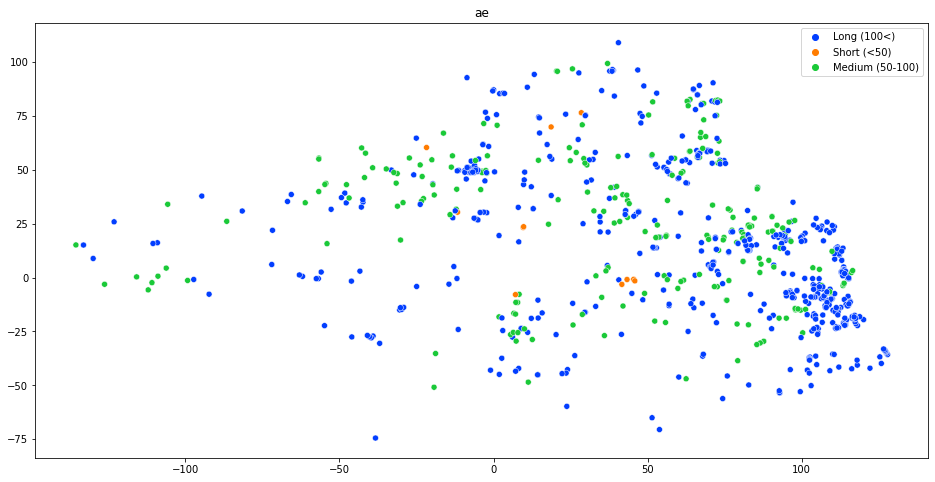

In [760]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
pca.fit(encodings)
encodingsPCA = pca.transform(encodings)
encodingsPCA.shape

numPairs2Plot = 5

for sv in spread_vows:

    sv_encodingsPCA = encodingsPCA[labels == phones2codes[sv]]

    tsne = TSNE(n_components=2, perplexity=50, verbose=False, n_jobs=-1, n_iter=3000)
    sv_encodingsTsne = tsne.fit_transform(sv_encodingsPCA)

    idx_where_vow = labels == phones2codes[sv]

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = lenLabels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numPairs2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(code2len[int(y[i].item())])

    plt.figure(figsize=(16, 8))
    #ns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", y.unique().shape[0]))
    plt.title(sv)
    plt.show()

# Consonants VS Vowels overview

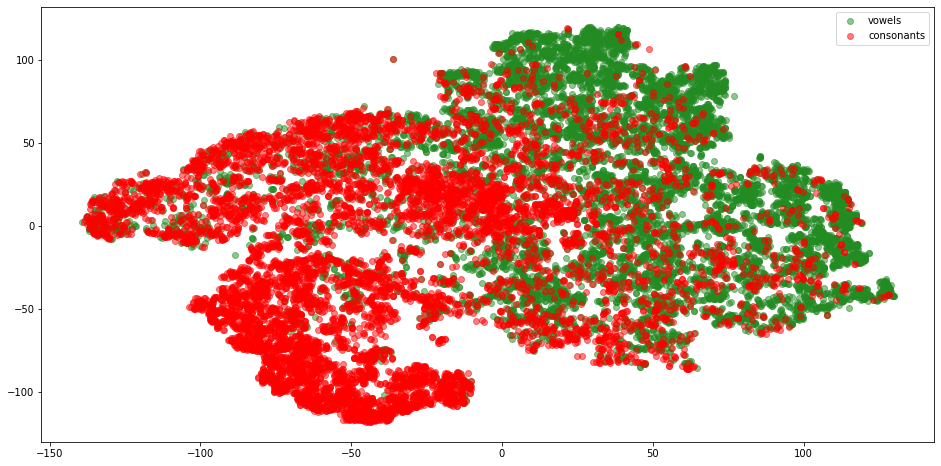

In [761]:
plt.figure(figsize=(16, 8))
plt.scatter(v[:,0], v[:,1], color='forestgreen', label='vowels', alpha=0.5)
plt.scatter(c[:,0], c[:,1], color='red', label='consonants', alpha=0.5)
plt.legend()
plt.show()

- acpc-baseline-cosine-norelu-ls+buckeye: np.where(v[:,1] > 110)[0]
- hacpc-gt-cosine-norelu-encodeseg-ls: np.where(v[:,1] > 120)[0] AND np.where((v[:,1] > 50) & (v[:,0] < -75))[0]
- hacpc-cosine-norelu-kreuk-encodeseg-ls+buckeye: np.where(v[:,1] < -120)[0] AND np.where((v[:,1] > 75) & (v[:,0] > 75))[0]

# Very visible small clusters in some models - vowels

In [762]:
# clustered_vecs = np.where(v[:,1] < -120)[0]
# clustered_encs = selected_encs[clustered_vecs]
# print(set(labels[clustered_vecs]))

# x = np.arange(0, clustered_encs.shape[0])
# y = np.arange(0, 256)
# X, Y = np.meshgrid(x, y)

# clustered_encs_1 = clustered_encs / np.sqrt((clustered_encs**2).sum(1, keepdims=True))
# Z = clustered_encs_1.reshape(clustered_encs.shape[0], clustered_encs.shape[1]).T

# plt.figure()
# plt.contourf(X, Y, Z, 10)
# plt.show()

# Very visible small clusters in some models - consonants

In [763]:
# clustered_vecs = np.where(v[:,1] < -120)[0]
# clustered_encs = selected_encs[clustered_vecs]
# print(set(labels[clustered_vecs]))

# x = np.arange(0, clustered_encs.shape[0])
# y = np.arange(0, 256)
# X, Y = np.meshgrid(x, y)

# clustered_encs_1 = clustered_encs / np.sqrt((clustered_encs**2).sum(1, keepdims=True))
# Z = clustered_encs_1.reshape(clustered_encs.shape[0], clustered_encs.shape[1]).T

# plt.figure()
# plt.contourf(X, Y, Z, 10)
# plt.show()

# Pairs of phones vizualizations - on global (not local phoneme) tSNE encodings

In [764]:
diffs = torch.diff(labels)
phoneChanges = torch.cat((torch.ones(1), diffs), dim=-1)
boundaries = torch.nonzero(phoneChanges.contiguous().view(-1), as_tuple=True)[0]

# Vowel + X

In [765]:
paired_labels = torch.clone(labels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(len(boundaries)-1):
    current_phone = codes2phones[labels[boundaries[b]].item()]
    if current_phone in ['eh', 'ah', 'ay', 'ae', 'ow', 'ih']: 
        next_phone = codes2phones[labels[boundaries[b+1]].item()]
        if (current_phone, next_phone) not in pairs:
            pairs.append((current_phone, next_phone))
            paired_phones2codes[(current_phone + '-' + next_phone)] = surplus
            surplus += 1
        paired_labels[boundaries[b]:boundaries[b+1]] = paired_phones2codes[(current_phone + '-' + next_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


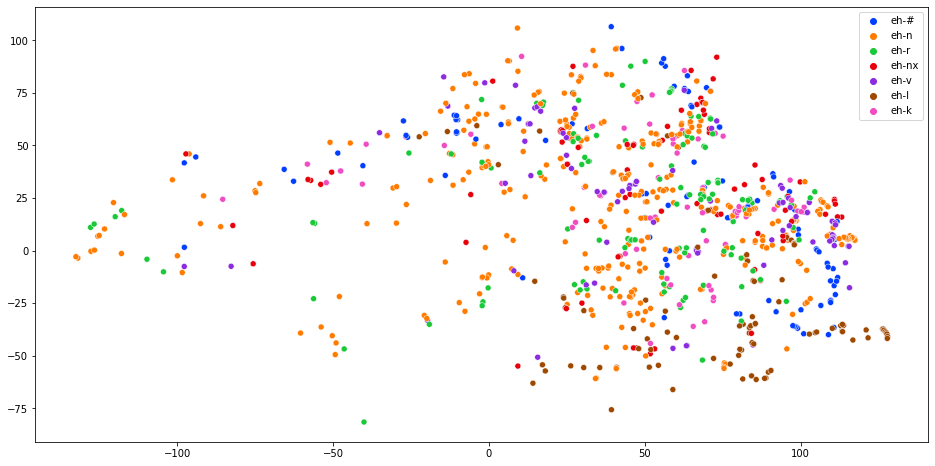

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


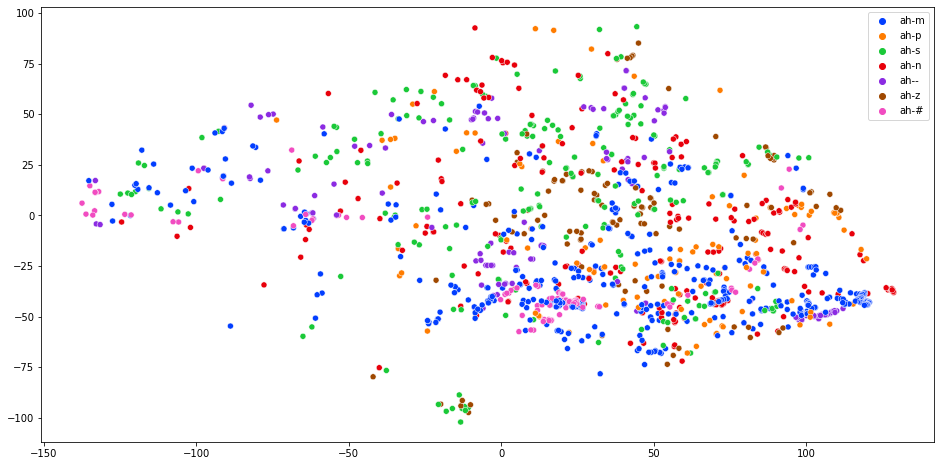

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


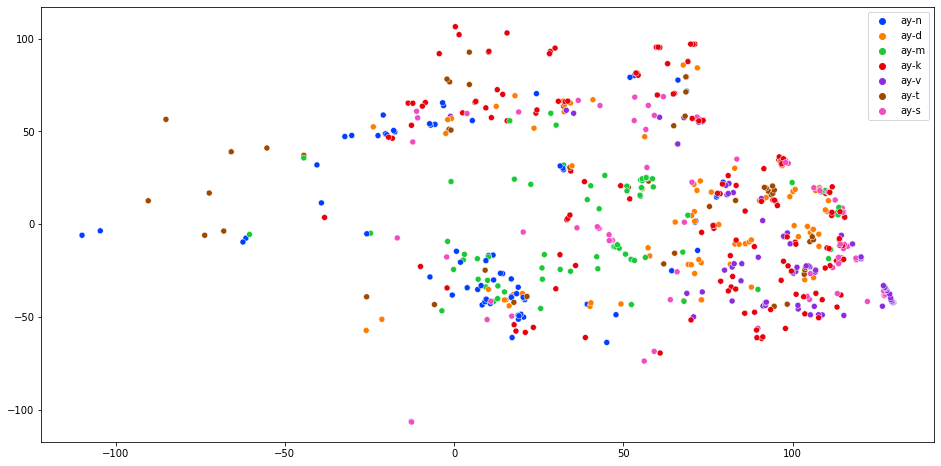

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


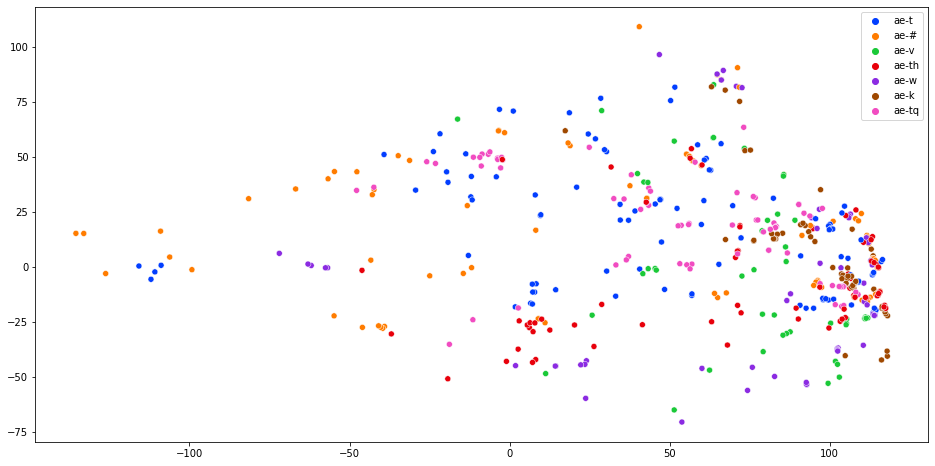

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


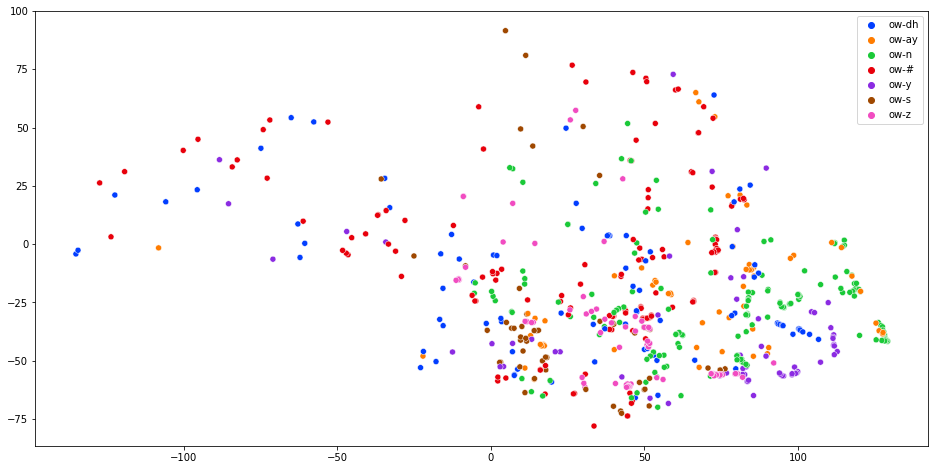

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


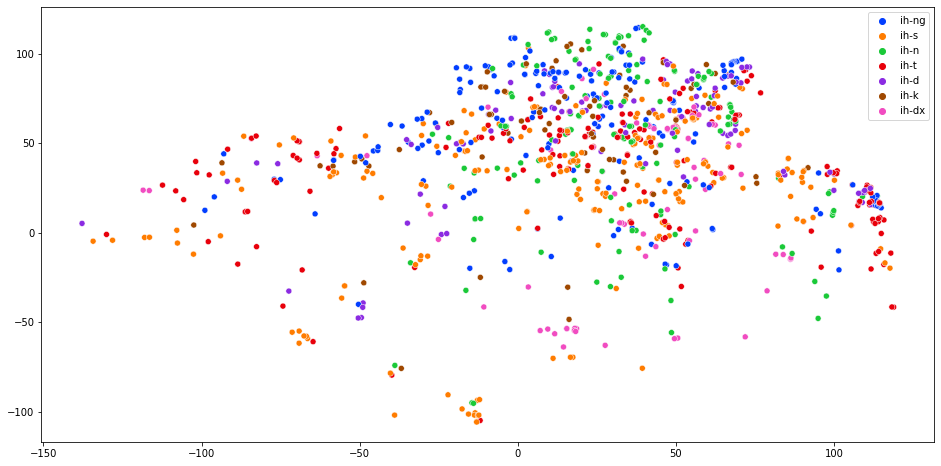

In [766]:
for vow in ['eh', 'ah', 'ay', 'ae', 'ow', 'ih']:

    numClasses2Plot = 7

    idx_where_vow = labels == phones2codes[vow]

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numClasses2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    sns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numClasses2Plot))
    plt.show()

In [767]:
paired_labels = torch.clone(labels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(len(boundaries)-1):
    current_phone = codes2phones[labels[boundaries[b]].item()]
    if current_phone in ['eh', 'ah', 'ow']: 
        next_phone = codes2phones[labels[boundaries[b+1]].item()]
        if next_phone not in ['r', 'l']:
            continue
        if (current_phone, next_phone) not in pairs:
            pairs.append((current_phone, next_phone))
            paired_phones2codes[(current_phone + '-' + next_phone)] = surplus
            surplus += 1
        paired_labels[boundaries[b]:boundaries[b+1]] = paired_phones2codes[(current_phone + '-' + next_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


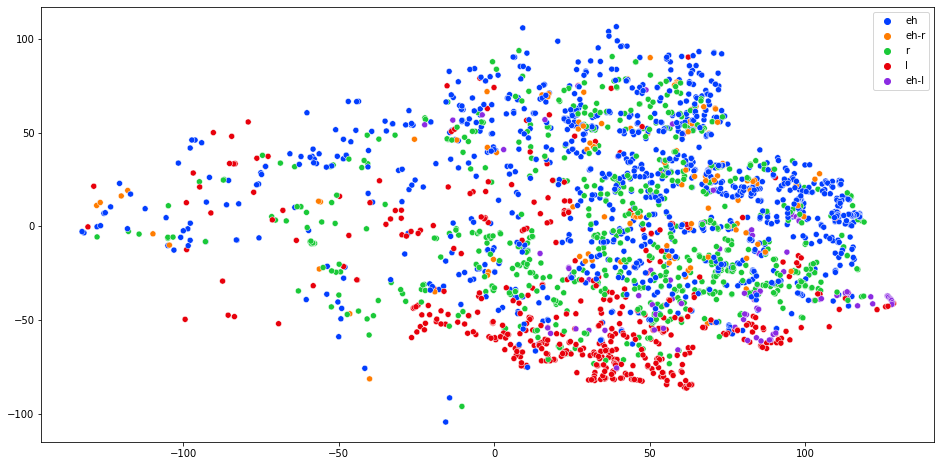

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


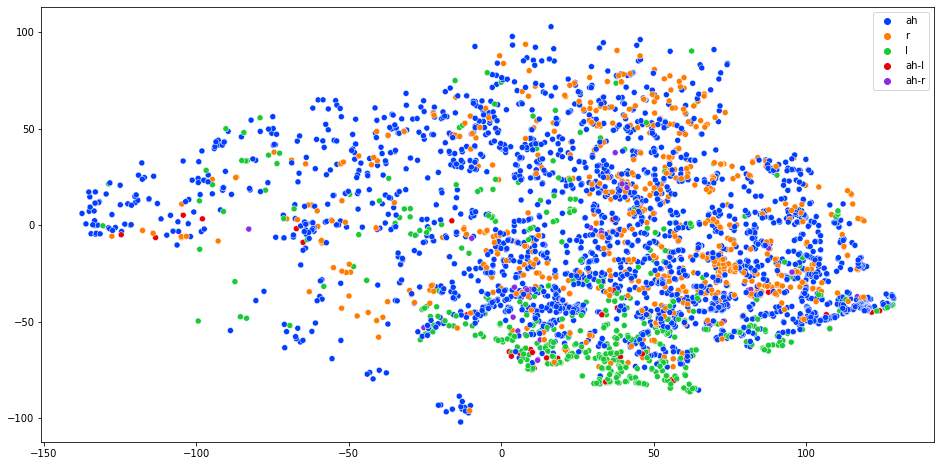

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


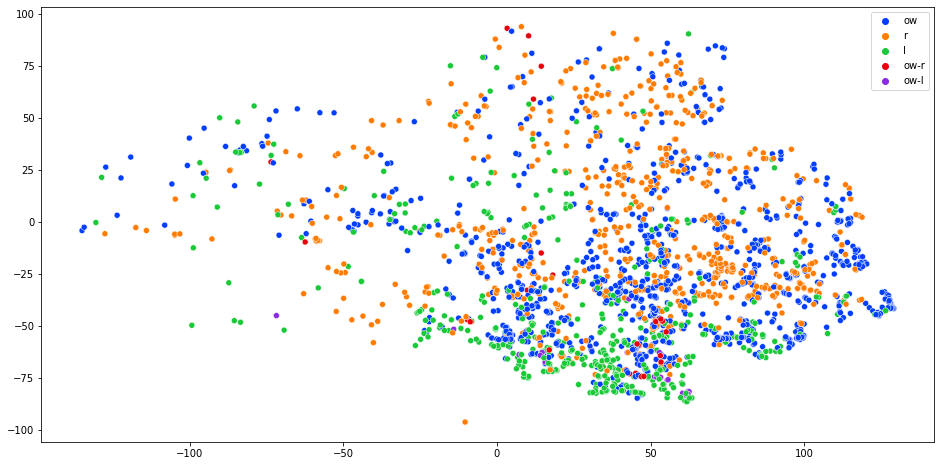

In [768]:
for vow in ['eh', 'ah', 'ow']:

    numClasses2Plot = 7

    idx_where_vow = (labels == phones2codes[vow]) | (labels == phones2codes['l']) | (labels == phones2codes['r'])

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numClasses2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        try:
            z.append(paired_codes2phones[y[i].item()])
        except:
            z.append(codes2phones[y[i].item()])
    plt.figure(figsize=(16, 8))
    sns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full')
    plt.show()

# Consonant + X

In [769]:
paired_labels = torch.clone(labels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(len(boundaries)-1):
    current_phone = codes2phones[labels[boundaries[b]].item()]
    if current_phone in ['r', 'l', 'w']: 
        next_phone = codes2phones[labels[boundaries[b+1]].item()]
        if (current_phone, next_phone) not in pairs:
            pairs.append((current_phone, next_phone))
            paired_phones2codes[(current_phone + '-' + next_phone)] = surplus
            surplus += 1
        paired_labels[boundaries[b]:boundaries[b+1]] = paired_phones2codes[(current_phone + '-' + next_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


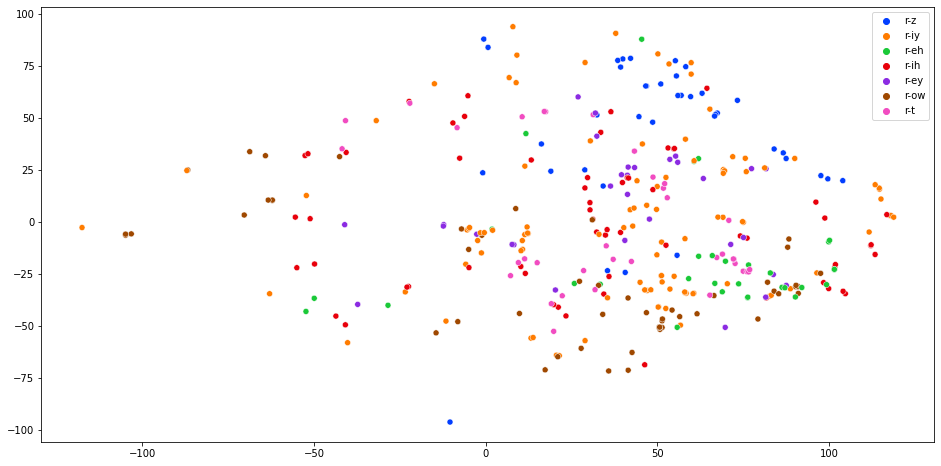

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


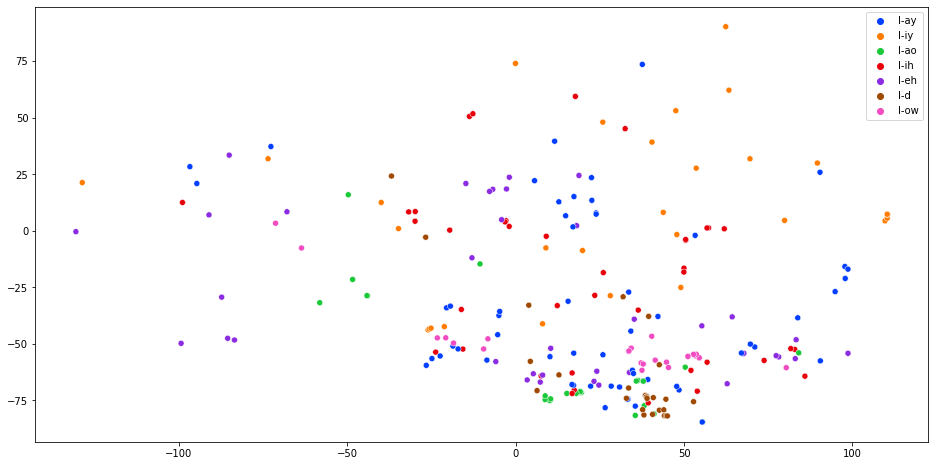

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


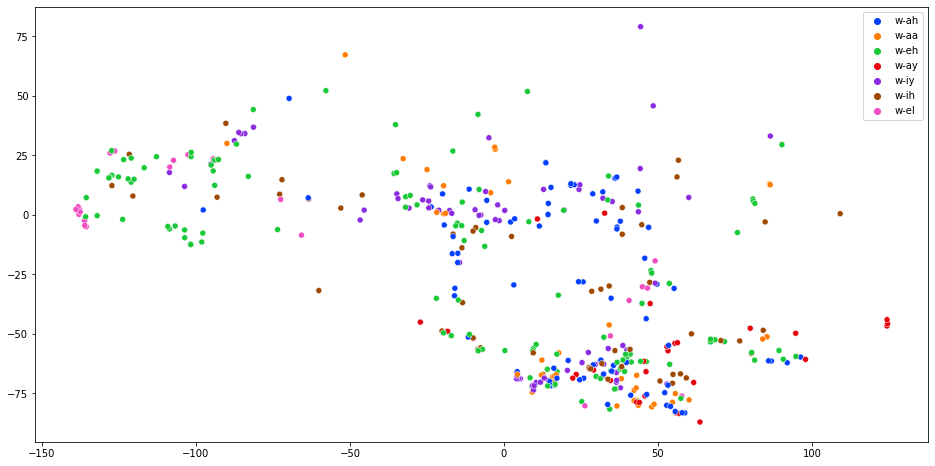

In [770]:
for cs in ['r', 'l', 'w']:

    numClasses2Plot = 7

    idx_where_cs = labels == phones2codes[cs]

    cs_x = encodingsTsne[idx_where_cs, :]
    cs_y = paired_labels[idx_where_cs]

    classes2Keep = pd.Series(cs_y).value_counts().index[:numClasses2Plot].tolist()

    idxs2Keep = []
    for i in range(len(cs_y)):
        if cs_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = cs_x[idxs2Keep, :]
    y = cs_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    sns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numClasses2Plot))
    plt.show()

# X + Vowel

In [771]:
paired_labels = torch.clone(labels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(1, len(boundaries)-1):
    current_phone = codes2phones[labels[boundaries[b]].item()]
    if current_phone in ['eh', 'ah', 'ay', 'ae', 'ow', 'ih', 'y']: 
        prev_phone = codes2phones[labels[boundaries[b-1]].item()]
        if (prev_phone, current_phone) not in pairs:
            pairs.append((prev_phone, current_phone))
            paired_phones2codes[(prev_phone + '-' + current_phone)] = surplus
            surplus += 1
        paired_labels[boundaries[b]:boundaries[b+1]] = paired_phones2codes[(prev_phone + '-' + current_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


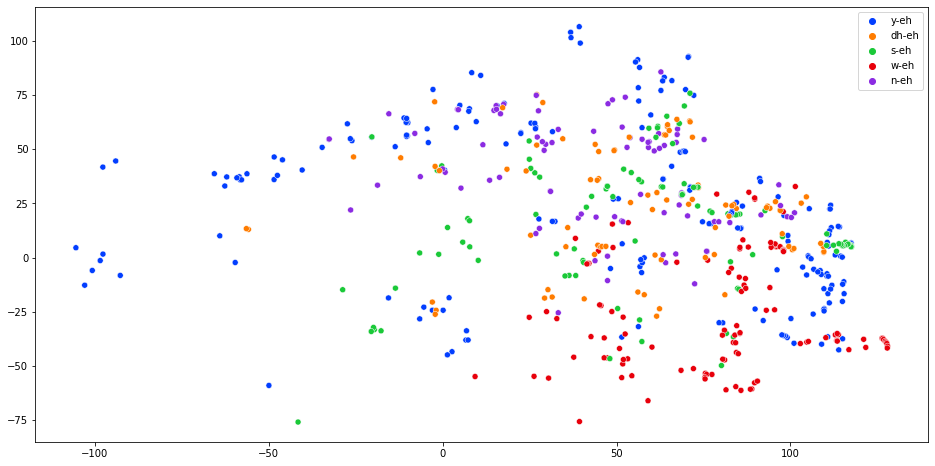

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


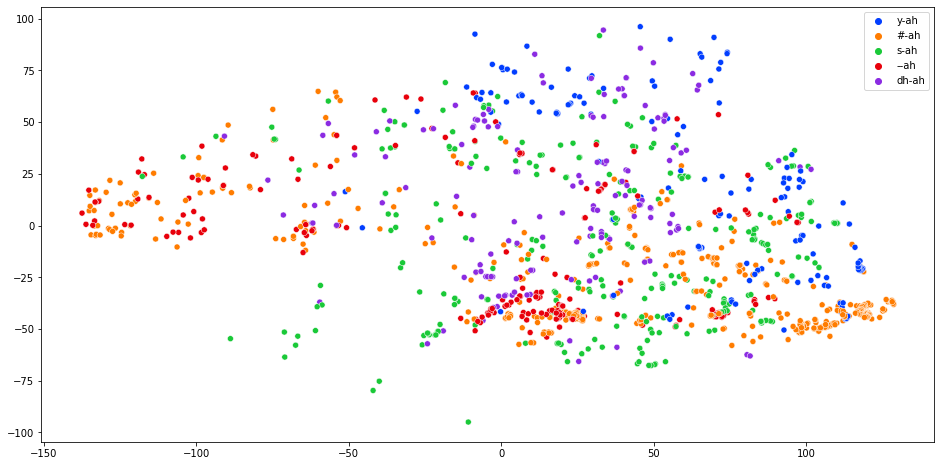

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


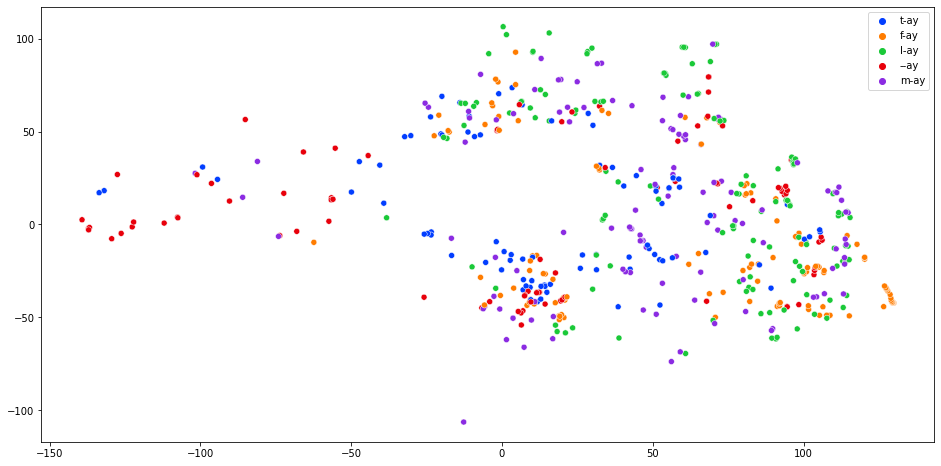

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


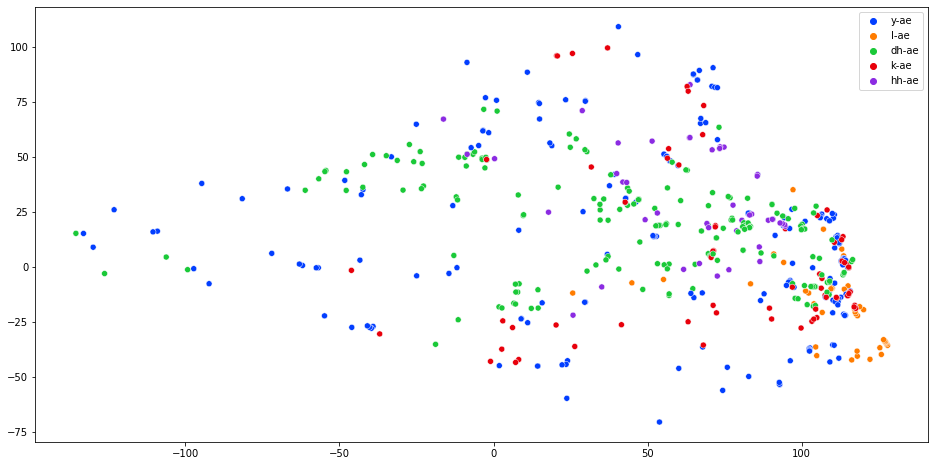

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


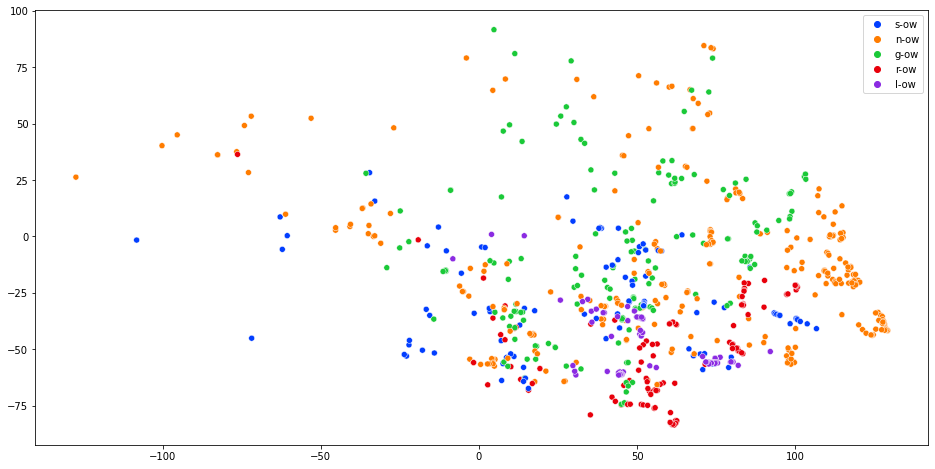

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


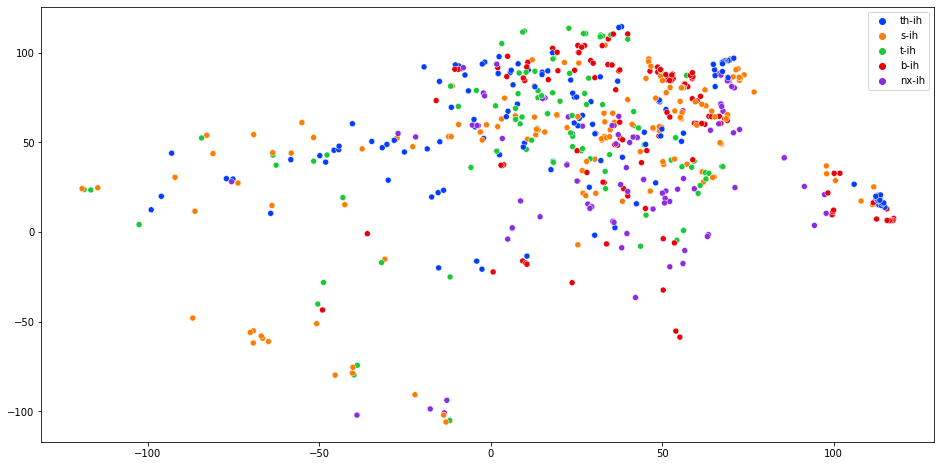

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


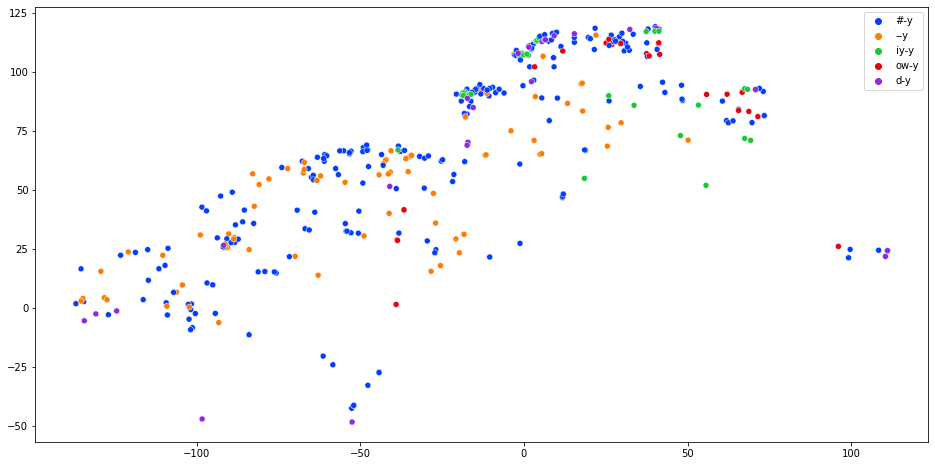

In [772]:
for vow in ['eh', 'ah', 'ay', 'ae', 'ow', 'ih', 'y']:

    numClasses2Plot = 5

    idx_where_vow = labels == phones2codes[vow]

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numClasses2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    sns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numClasses2Plot))
    plt.show()

In [773]:
paired_labels = torch.clone(labels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(1, len(boundaries)-1):
    current_phone = codes2phones[labels[boundaries[b]].item()]
    if current_phone in ['r', 'l', 'w']: 
        prev_phone = codes2phones[labels[boundaries[b-1]].item()]
        if (prev_phone, current_phone) not in pairs:
            pairs.append((prev_phone, current_phone))
            paired_phones2codes[(prev_phone + '-' + current_phone)] = surplus
            surplus += 1
        paired_labels[boundaries[b]:boundaries[b+1]] = paired_phones2codes[(prev_phone + '-' + current_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


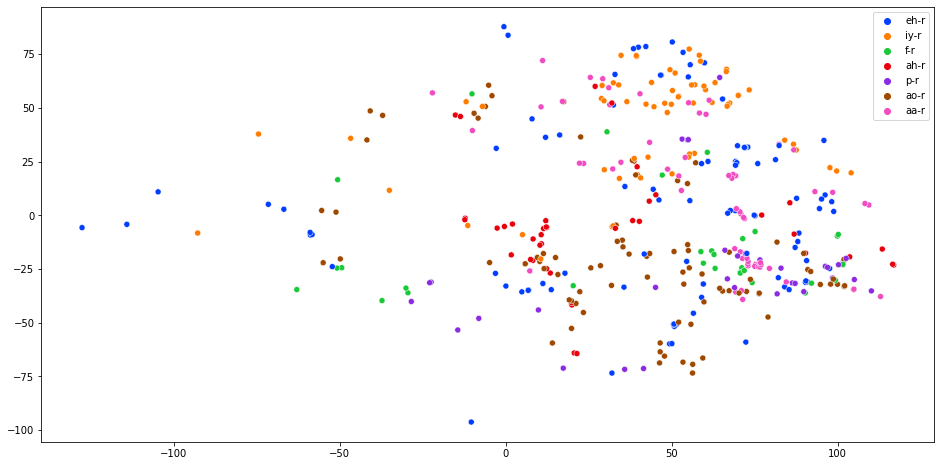

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


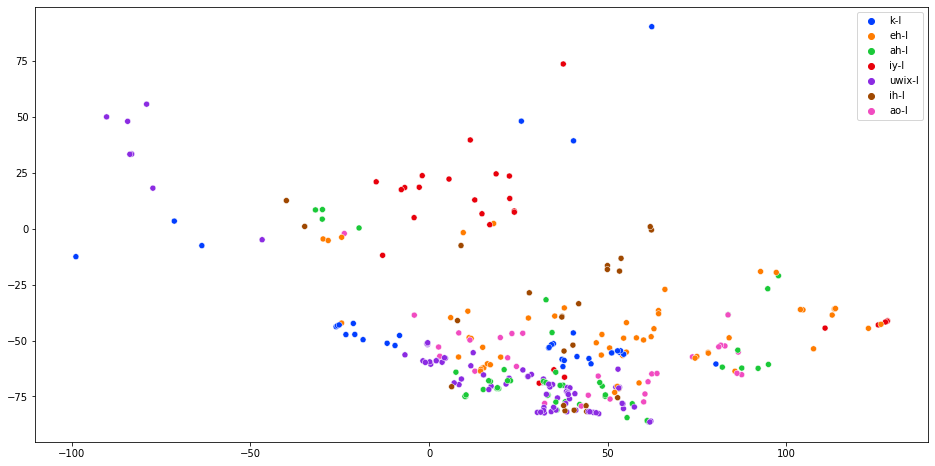

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


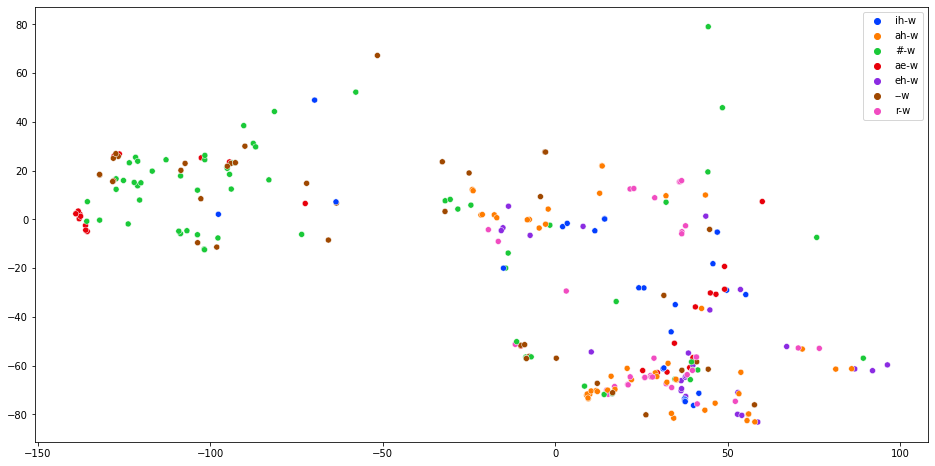

In [774]:
for cs in ['r', 'l', 'w']:

    numClasses2Plot = 7

    idx_where_cs = labels == phones2codes[cs]

    cs_x = encodingsTsne[idx_where_cs, :]
    cs_y = paired_labels[idx_where_cs]

    classes2Keep = pd.Series(cs_y).value_counts().index[:numClasses2Plot].tolist()

    idxs2Keep = []
    for i in range(len(cs_y)):
        if cs_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = cs_x[idxs2Keep, :]
    y = cs_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    sns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numClasses2Plot))
    plt.show()

# Repeat above with averaged segments?

In [775]:
diffs = torch.diff(labels)
phoneChanges = torch.cat((torch.ones(1), diffs), dim=-1)
boundaries = torch.nonzero(phoneChanges.contiguous().view(-1), as_tuple=True)[0]
bin_boundaries = phoneChanges != 0
cumsum_boundaries = torch.cumsum(bin_boundaries, dim=-1)
N_segments = bin_boundaries.sum()

U = torch.arange(1, N_segments+1).view(-1, N_segments).expand(bin_boundaries.shape[0], -1)
V = U - cumsum_boundaries.view(bin_boundaries.shape[0], -1)
W = 1 - torch.tanh(100000 * abs(V))
phoneLengths = torch.sum(W, dim=0)
W /= torch.sum(W, dim=0)

avgSegmentEncodings = W.permute(1, 0) @ encodings
avgLabels = torch.unique_consecutive(labels)

In [776]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(encodings)
encodingsPCA = pca.transform(avgSegmentEncodings)
encodingsPCA.shape

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, verbose=True, n_jobs=-1, n_iter=3000)
encodingsTsne = tsne.fit_transform(encodingsPCA)
encodingsTsne.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3729 samples in 0.000s...
[t-SNE] Computed neighbors for 3729 samples in 0.699s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3729
[t-SNE] Computed conditional probabilities for sample 2000 / 3729
[t-SNE] Computed conditional probabilities for sample 3000 / 3729
[t-SNE] Computed conditional probabilities for sample 3729 / 3729
[t-SNE] Mean sigma: 5.841852
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.644836
[t-SNE] KL divergence after 3000 iterations: 1.102959


(3729, 2)

# Consonants

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

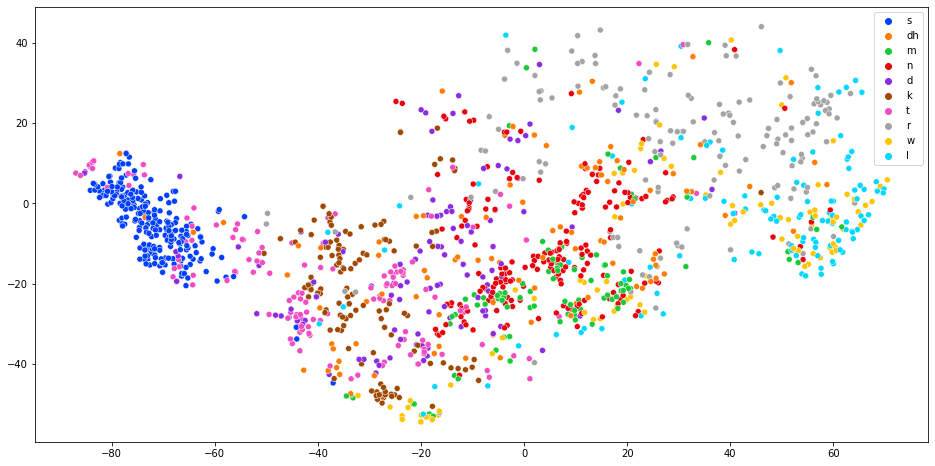

In [777]:
numClasses2Plot = 16
classes2Keep = pd.Series(avgLabels).value_counts().index[:numClasses2Plot].tolist()

idxs2Keep = []
for i in range(len(avgLabels)):
    if (avgLabels[i] in classes2Keep) or (codes2phones[avgLabels[i].item()][0] == 'l'):
        idxs2Keep.append(i)

x = encodingsTsne[idxs2Keep, :]
y = avgLabels[idxs2Keep]

idxs2Keep = []
for i in range(len(y)):
    if codes2phones[y[i].item()][0] not in ['a', 'e', 'i', 'o', 'u', 'y', '#']:
        idxs2Keep.append(i)

c = x[idxs2Keep, :]
y = y[idxs2Keep]

numClasses2Plot = len(np.unique(y))

z = []
for i in range(len(y)):
    z.append(codes2phones[y[i].item()])

plt.figure(figsize=(16, 8))
sns.scatterplot(c[:,0], c[:,1], hue=z, legend='full', palette=sns.color_palette("bright", len(set(z))))

# Vowels

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

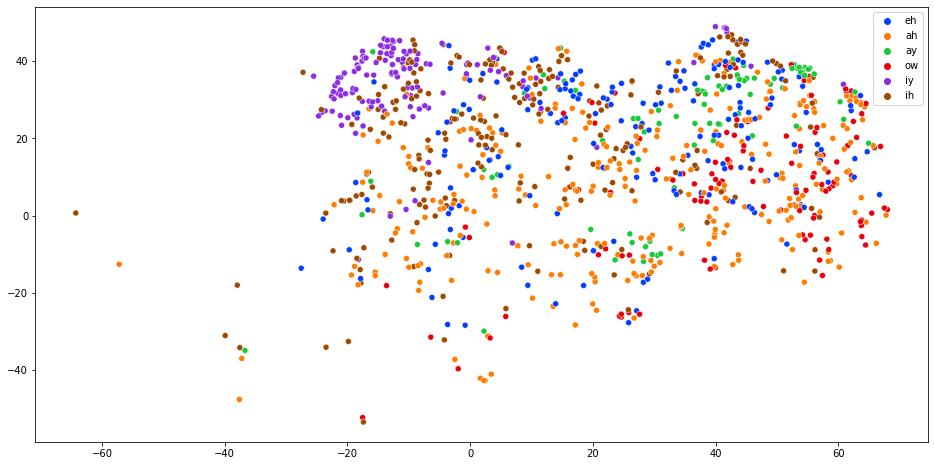

In [778]:
numClasses2Plot = 18
classes2Keep = pd.Series(avgLabels).value_counts().index[:numClasses2Plot].tolist()

idxs2Keep = []
for i in range(len(avgLabels)):
    if (avgLabels[i] in classes2Keep) or (codes2phones[avgLabels[i].item()][0] == 'l'):
        idxs2Keep.append(i)

x = encodingsTsne[idxs2Keep, :]
y = avgLabels[idxs2Keep]

idxs2Keep = []
for i in range(len(y)):
    if codes2phones[y[i].item()][0] in ['a', 'e', 'i', 'o', 'u', 'y']:
        idxs2Keep.append(i)

v = x[idxs2Keep, :]
y = y[idxs2Keep]

numClasses2Plot = len(np.unique(y))

z = []
for i in range(len(y)):
    z.append(codes2phones[y[i].item()])

plt.figure(figsize=(16, 8))
sns.scatterplot(v[:,0], v[:,1], hue=z, legend='full', palette=sns.color_palette("bright", len(set(z))))

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


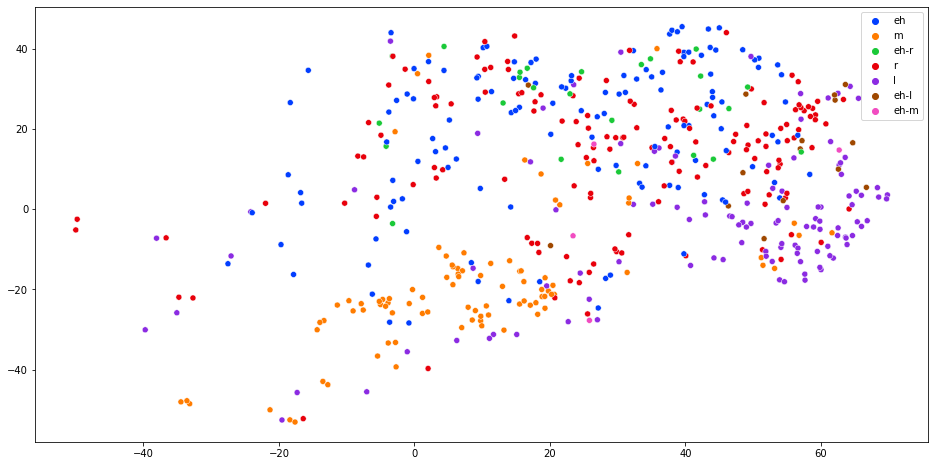

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


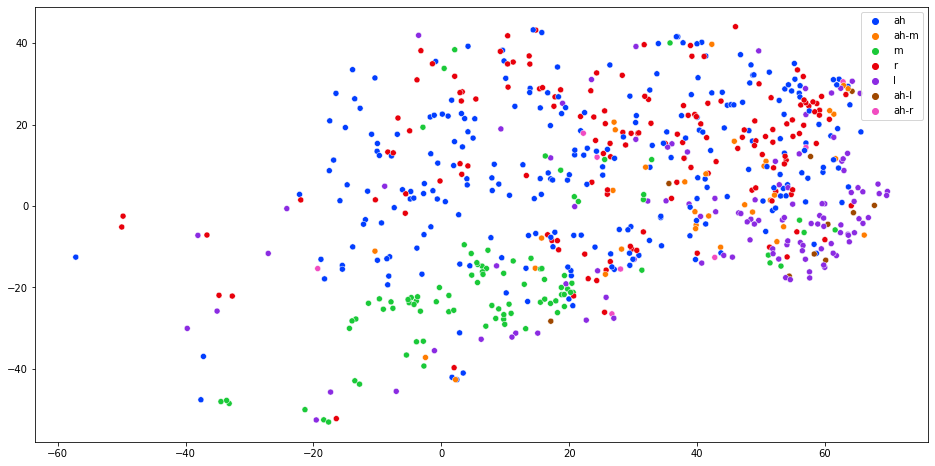

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


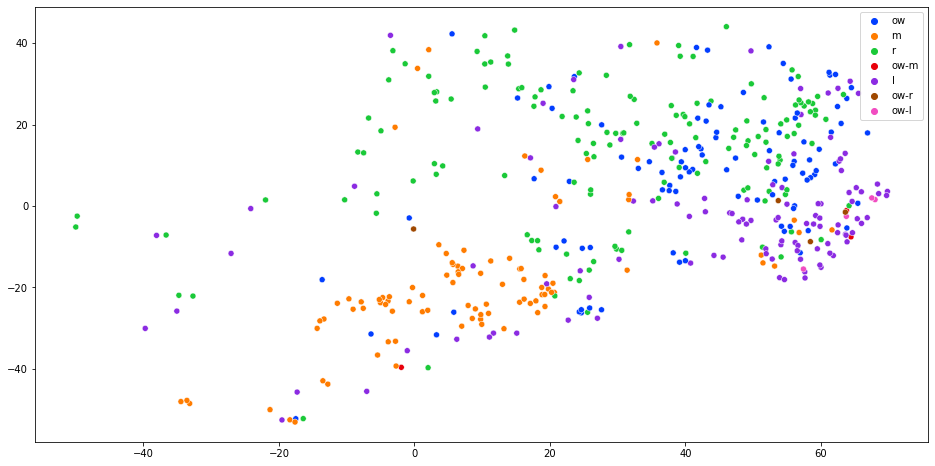

In [779]:
paired_labels = torch.clone(avgLabels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(len(avgLabels)-1):
    current_phone = codes2phones[avgLabels[b].item()]
    if current_phone in ['eh', 'ah', 'ow']: 
        next_phone = codes2phones[avgLabels[b+1].item()]
        if next_phone not in ['r', 'l', 'm']:
            continue
        if (current_phone, next_phone) not in pairs:
            pairs.append((current_phone, next_phone))
            paired_phones2codes[(current_phone + '-' + next_phone)] = surplus
            surplus += 1
        paired_labels[b] = paired_phones2codes[(current_phone + '-' + next_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

for vow in ['eh', 'ah', 'ow']:

    numClasses2Plot = 7

    idx_where_vow = (avgLabels == phones2codes[vow]) | (avgLabels == phones2codes['l']) | (avgLabels == phones2codes['r']) | (avgLabels == phones2codes['m'])

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numClasses2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        try:
            z.append(paired_codes2phones[y[i].item()])
        except:
            z.append(codes2phones[y[i].item()])
    plt.figure(figsize=(16, 8))
    sns.set_palette("bright", n_colors=numClasses2Plot)
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full')
    plt.show()

# Vowel + X

In [780]:
spread_vows = ['ah', 'eh', 'ae']

paired_labels = torch.clone(avgLabels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(len(avgLabels)-1):
    current_phone = codes2phones[avgLabels[b].item()]
    if current_phone in spread_vows: 
        next_phone = codes2phones[avgLabels[b+1].item()]
        if (current_phone, next_phone) not in pairs:
            pairs.append((current_phone, next_phone))
            paired_phones2codes[(current_phone + '-' + next_phone)] = surplus
            surplus += 1
        paired_labels[b] = paired_phones2codes[(current_phone + '-' + next_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


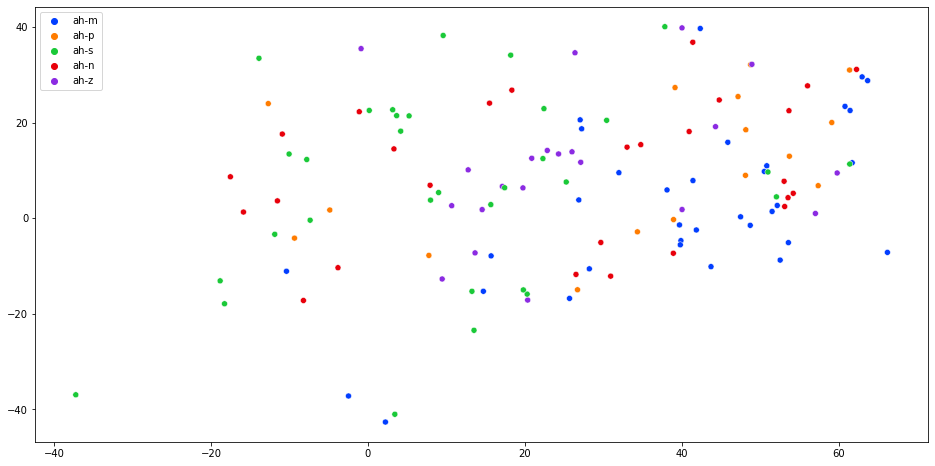

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


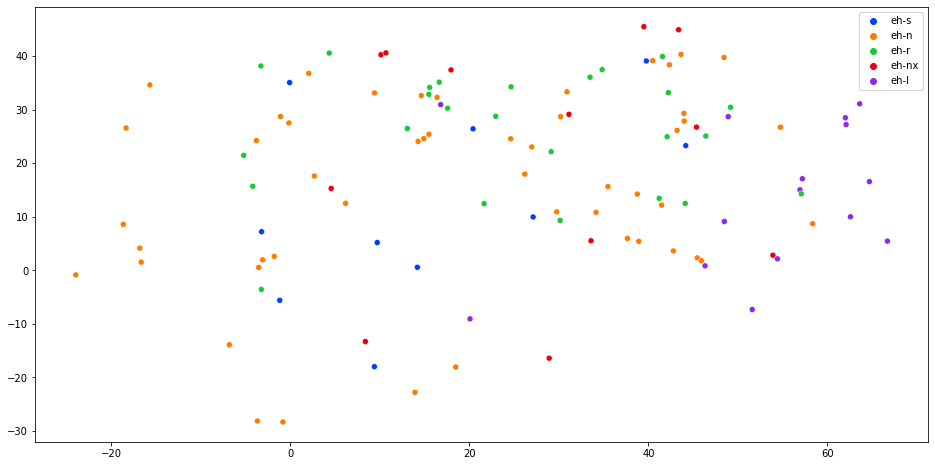

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


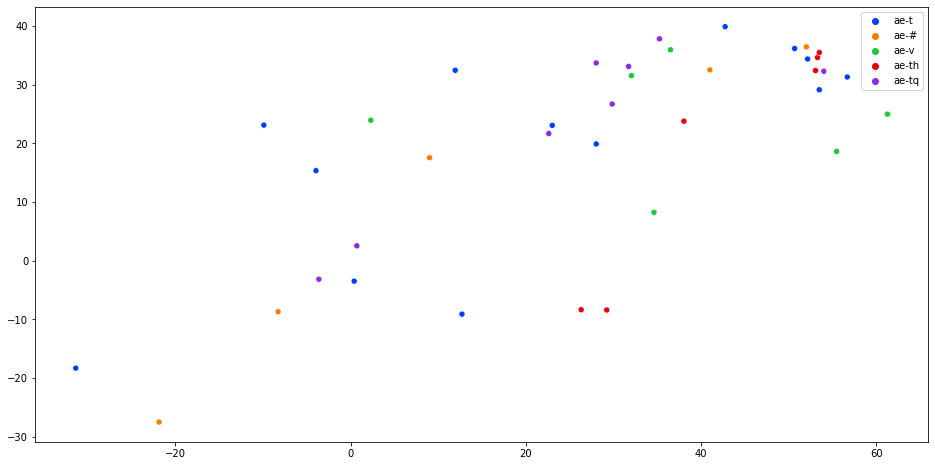

In [781]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
pca.fit(avgSegmentEncodings)
encodingsPCA = pca.transform(avgSegmentEncodings)
encodingsPCA.shape

numPairs2Plot = 5

for sv in spread_vows:

    sv_encodingsPCA = encodingsPCA[avgLabels == phones2codes[sv]]

    tsne = TSNE(n_components=2, perplexity=5, verbose=False, n_jobs=-1, n_iter=3000)
    sv_encodingsTsne = tsne.fit_transform(sv_encodingsPCA)

    idx_where_vow = avgLabels == phones2codes[sv]

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numPairs2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numPairs2Plot))
    plt.show()

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


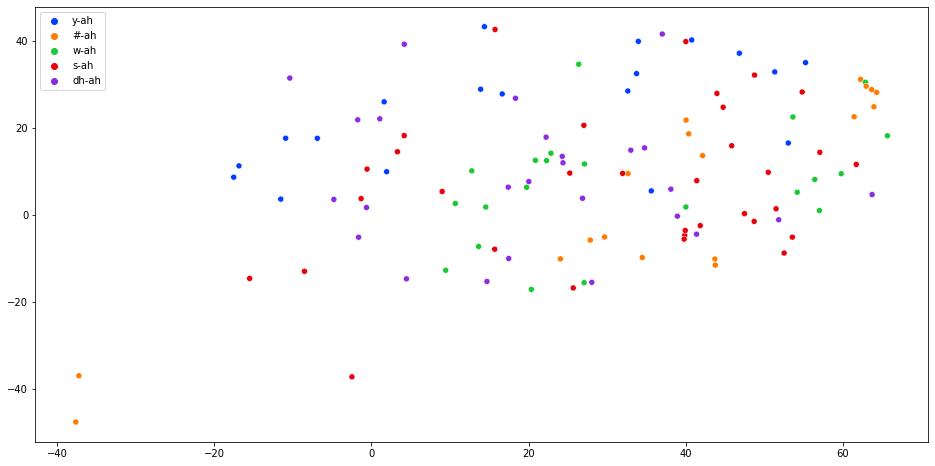

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


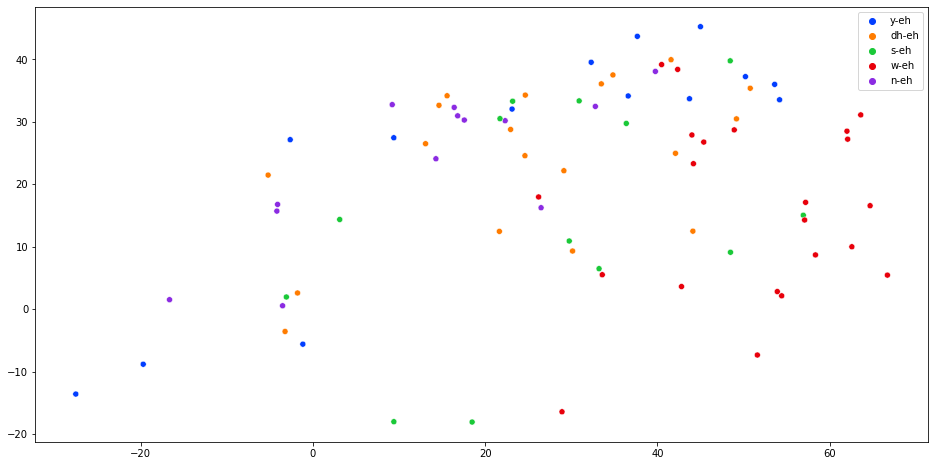

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


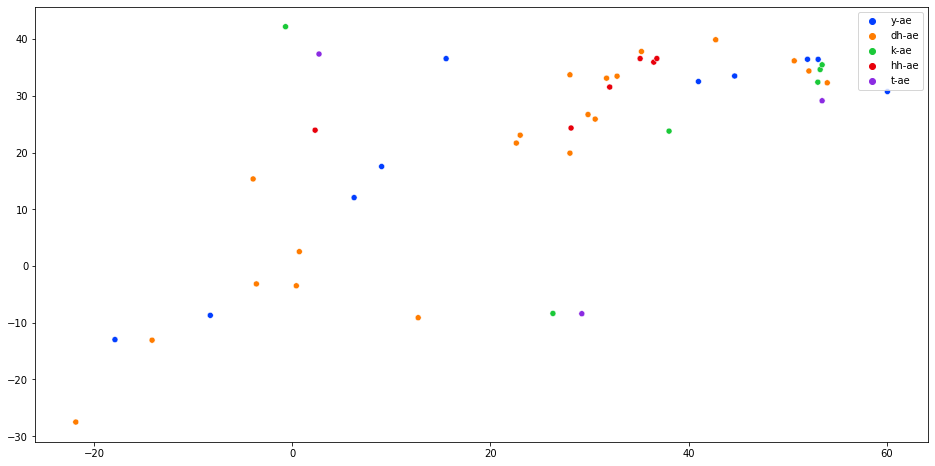

In [782]:
spread_vows = ['ah', 'eh', 'ae']

paired_labels = torch.clone(avgLabels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(1, len(avgLabels)):
    current_phone = codes2phones[avgLabels[b].item()]
    if current_phone in spread_vows: 
        prev_phone = codes2phones[avgLabels[b-1].item()]
        if (prev_phone, current_phone) not in pairs:
            pairs.append((prev_phone, current_phone))
            paired_phones2codes[(prev_phone + '-' + current_phone)] = surplus
            surplus += 1
        paired_labels[b] = paired_phones2codes[(prev_phone + '-' + current_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
pca.fit(avgSegmentEncodings)
encodingsPCA = pca.transform(avgSegmentEncodings)
encodingsPCA.shape

numPairs2Plot = 5

for sv in spread_vows:

    sv_encodingsPCA = encodingsPCA[avgLabels == phones2codes[sv]]

    tsne = TSNE(n_components=2, perplexity=5, verbose=False, n_jobs=-1, n_iter=3000)
    sv_encodingsTsne = tsne.fit_transform(sv_encodingsPCA)

    idx_where_vow = avgLabels == phones2codes[sv]

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numPairs2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numPairs2Plot))
    plt.show()

# X + Vowel

In [783]:
spread_vows = ['ah', 'eh', 'ae']

paired_labels = torch.clone(avgLabels)
paired_phones2codes = {}
pairs = []
surplus = max(phones2codes.values()) + 1
for b in range(1, len(avgLabels)):
    current_phone = codes2phones[avgLabels[b].item()]
    if current_phone in spread_vows: 
        prev_phone = codes2phones[avgLabels[b-1].item()]
        if (prev_phone, current_phone) not in pairs:
            pairs.append((prev_phone, current_phone))
            paired_phones2codes[(prev_phone + '-' + current_phone)] = surplus
            surplus += 1
        paired_labels[b] = paired_phones2codes[(prev_phone + '-' + current_phone)]
paired_codes2phones = {v: k for k, v in paired_phones2codes.items()} 

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


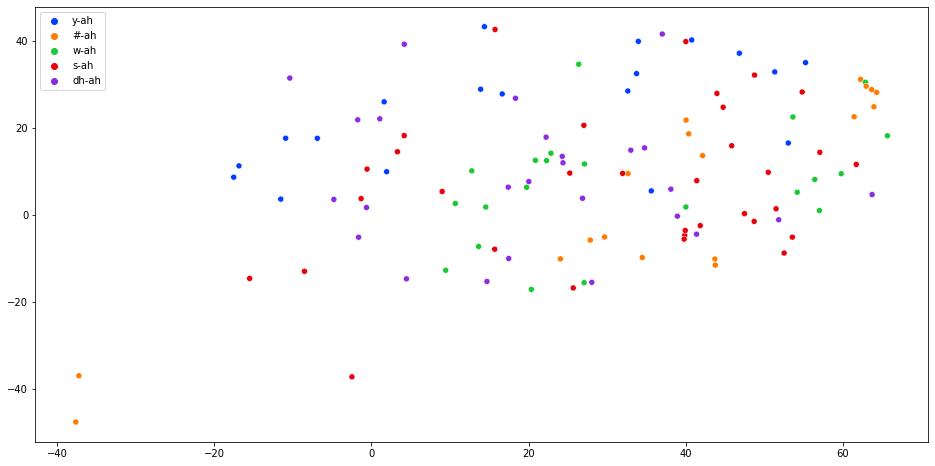

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


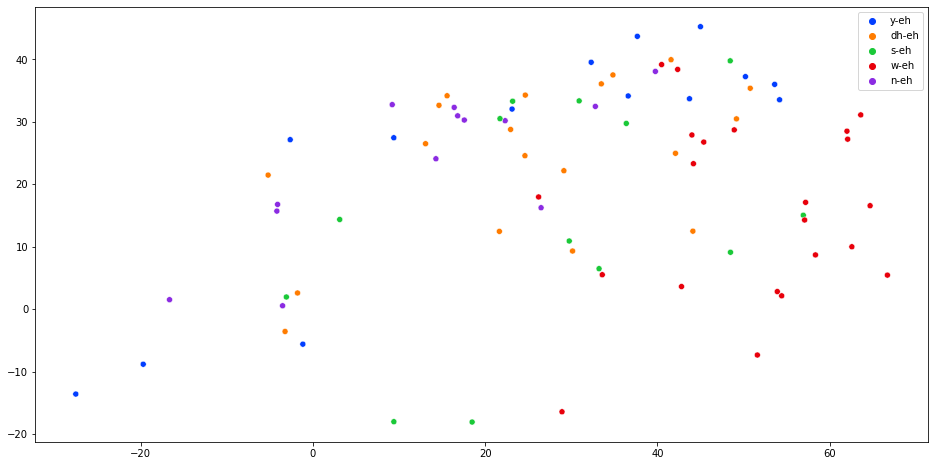

/pio/scratch/1/i325922/miniconda3/envs/cpc37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


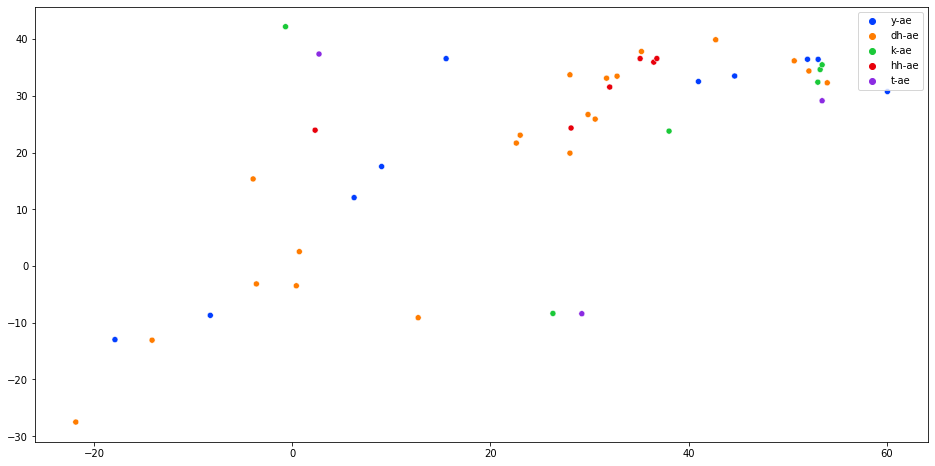

In [784]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
pca.fit(avgSegmentEncodings)
encodingsPCA = pca.transform(avgSegmentEncodings)
encodingsPCA.shape

numPairs2Plot = 5

for sv in spread_vows:

    sv_encodingsPCA = encodingsPCA[avgLabels == phones2codes[sv]]

    tsne = TSNE(n_components=2, perplexity=5, verbose=False, n_jobs=-1, n_iter=3000)
    sv_encodingsTsne = tsne.fit_transform(sv_encodingsPCA)

    idx_where_vow = avgLabels == phones2codes[sv]

    vow_x = encodingsTsne[idx_where_vow, :]
    vow_y = paired_labels[idx_where_vow]

    classes2Keep = pd.Series(vow_y).value_counts().index[:numPairs2Plot].tolist()

    idxs2Keep = []
    for i in range(len(vow_y)):
        if vow_y[i] in classes2Keep:
            idxs2Keep.append(i)

    x = vow_x[idxs2Keep, :]
    y = vow_y[idxs2Keep]

    z = []
    for i in range(len(y)):
        z.append(paired_codes2phones[y[i].item()])

    plt.figure(figsize=(16, 8))
    sns.scatterplot(x[:,0], x[:,1], hue=z, legend='full', palette=sns.color_palette("bright", numPairs2Plot))
    plt.show()

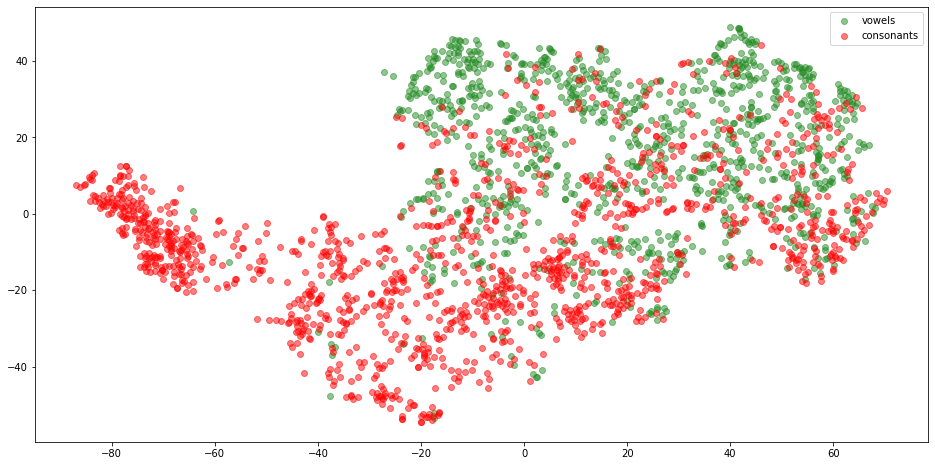

In [785]:
plt.figure(figsize=(16, 8))
plt.scatter(v[:,0], v[:,1], color='forestgreen', label='vowels', alpha=0.5)
plt.scatter(c[:,0], c[:,1], color='red', label='consonants', alpha=0.5)
plt.legend()
plt.show()